In [49]:
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import ast
import glob
import os
import sacredfig
sacredfig.style['mathtext.sf']='sans:italic'
import numpy as np
import seaborn as sns
from scipy import stats

In [50]:
plt.style.use(sacredfig.style)

In [51]:
import warnings
warnings.filterwarnings('ignore')

### Loading in filtered and structured dataframes from experiment
(See creating_data_structures.ipynb for info on how structure was created from empirica export)

In [52]:
combined_path = '/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment_data/prolific_data/combined_experiment_data/'
character_df = pd.read_csv(combined_path + "character_df.csv")
player_df = pd.read_csv(combined_path + "player_df.csv")
characterChoiceSurvey_df = pd.read_csv(combined_path + "characterChoiceSurvey_df.csv")
SwipeDecision_df = pd.read_csv(combined_path + "SwipeDecision_df.csv")
endRecSystemSurvey_df = pd.read_csv(combined_path + "endRecSystemSurvey_df.csv")
endDatingAppSurvey_df = pd.read_csv(combined_path + "endDatingAppSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = pd.read_csv(combined_path + "SwipeProfileRecSystemSurvey_df.csv")
SwipeProfileProfileChoiceSurvey_df = pd.read_csv(combined_path + "SwipeProfileProfileChoiceSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = SwipeProfileRecSystemSurvey_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id', how = 'left')

In [53]:
elo_ranking_df = pd.read_csv('/Users/franziskahafner/Desktop/oii/trinity/thesis/dating-app-experiment-analysis/elo_ranking_df.csv')


In [54]:
player_df['Country of residence'].value_counts()

United Kingdom    110
United States     100
Name: Country of residence, dtype: int64

In [55]:
player_df['Gender'].value_counts()

Man (including Trans Male/Trans Man)           84
Woman (including Trans Female/Trans Woman)     84
Non-binary (would like to give more detail)    42
Name: Gender, dtype: int64

In [56]:
len(player_df['chosenProfile'].value_counts())

106

### ER-Diagram with all Data Frame names, columns, and relationships

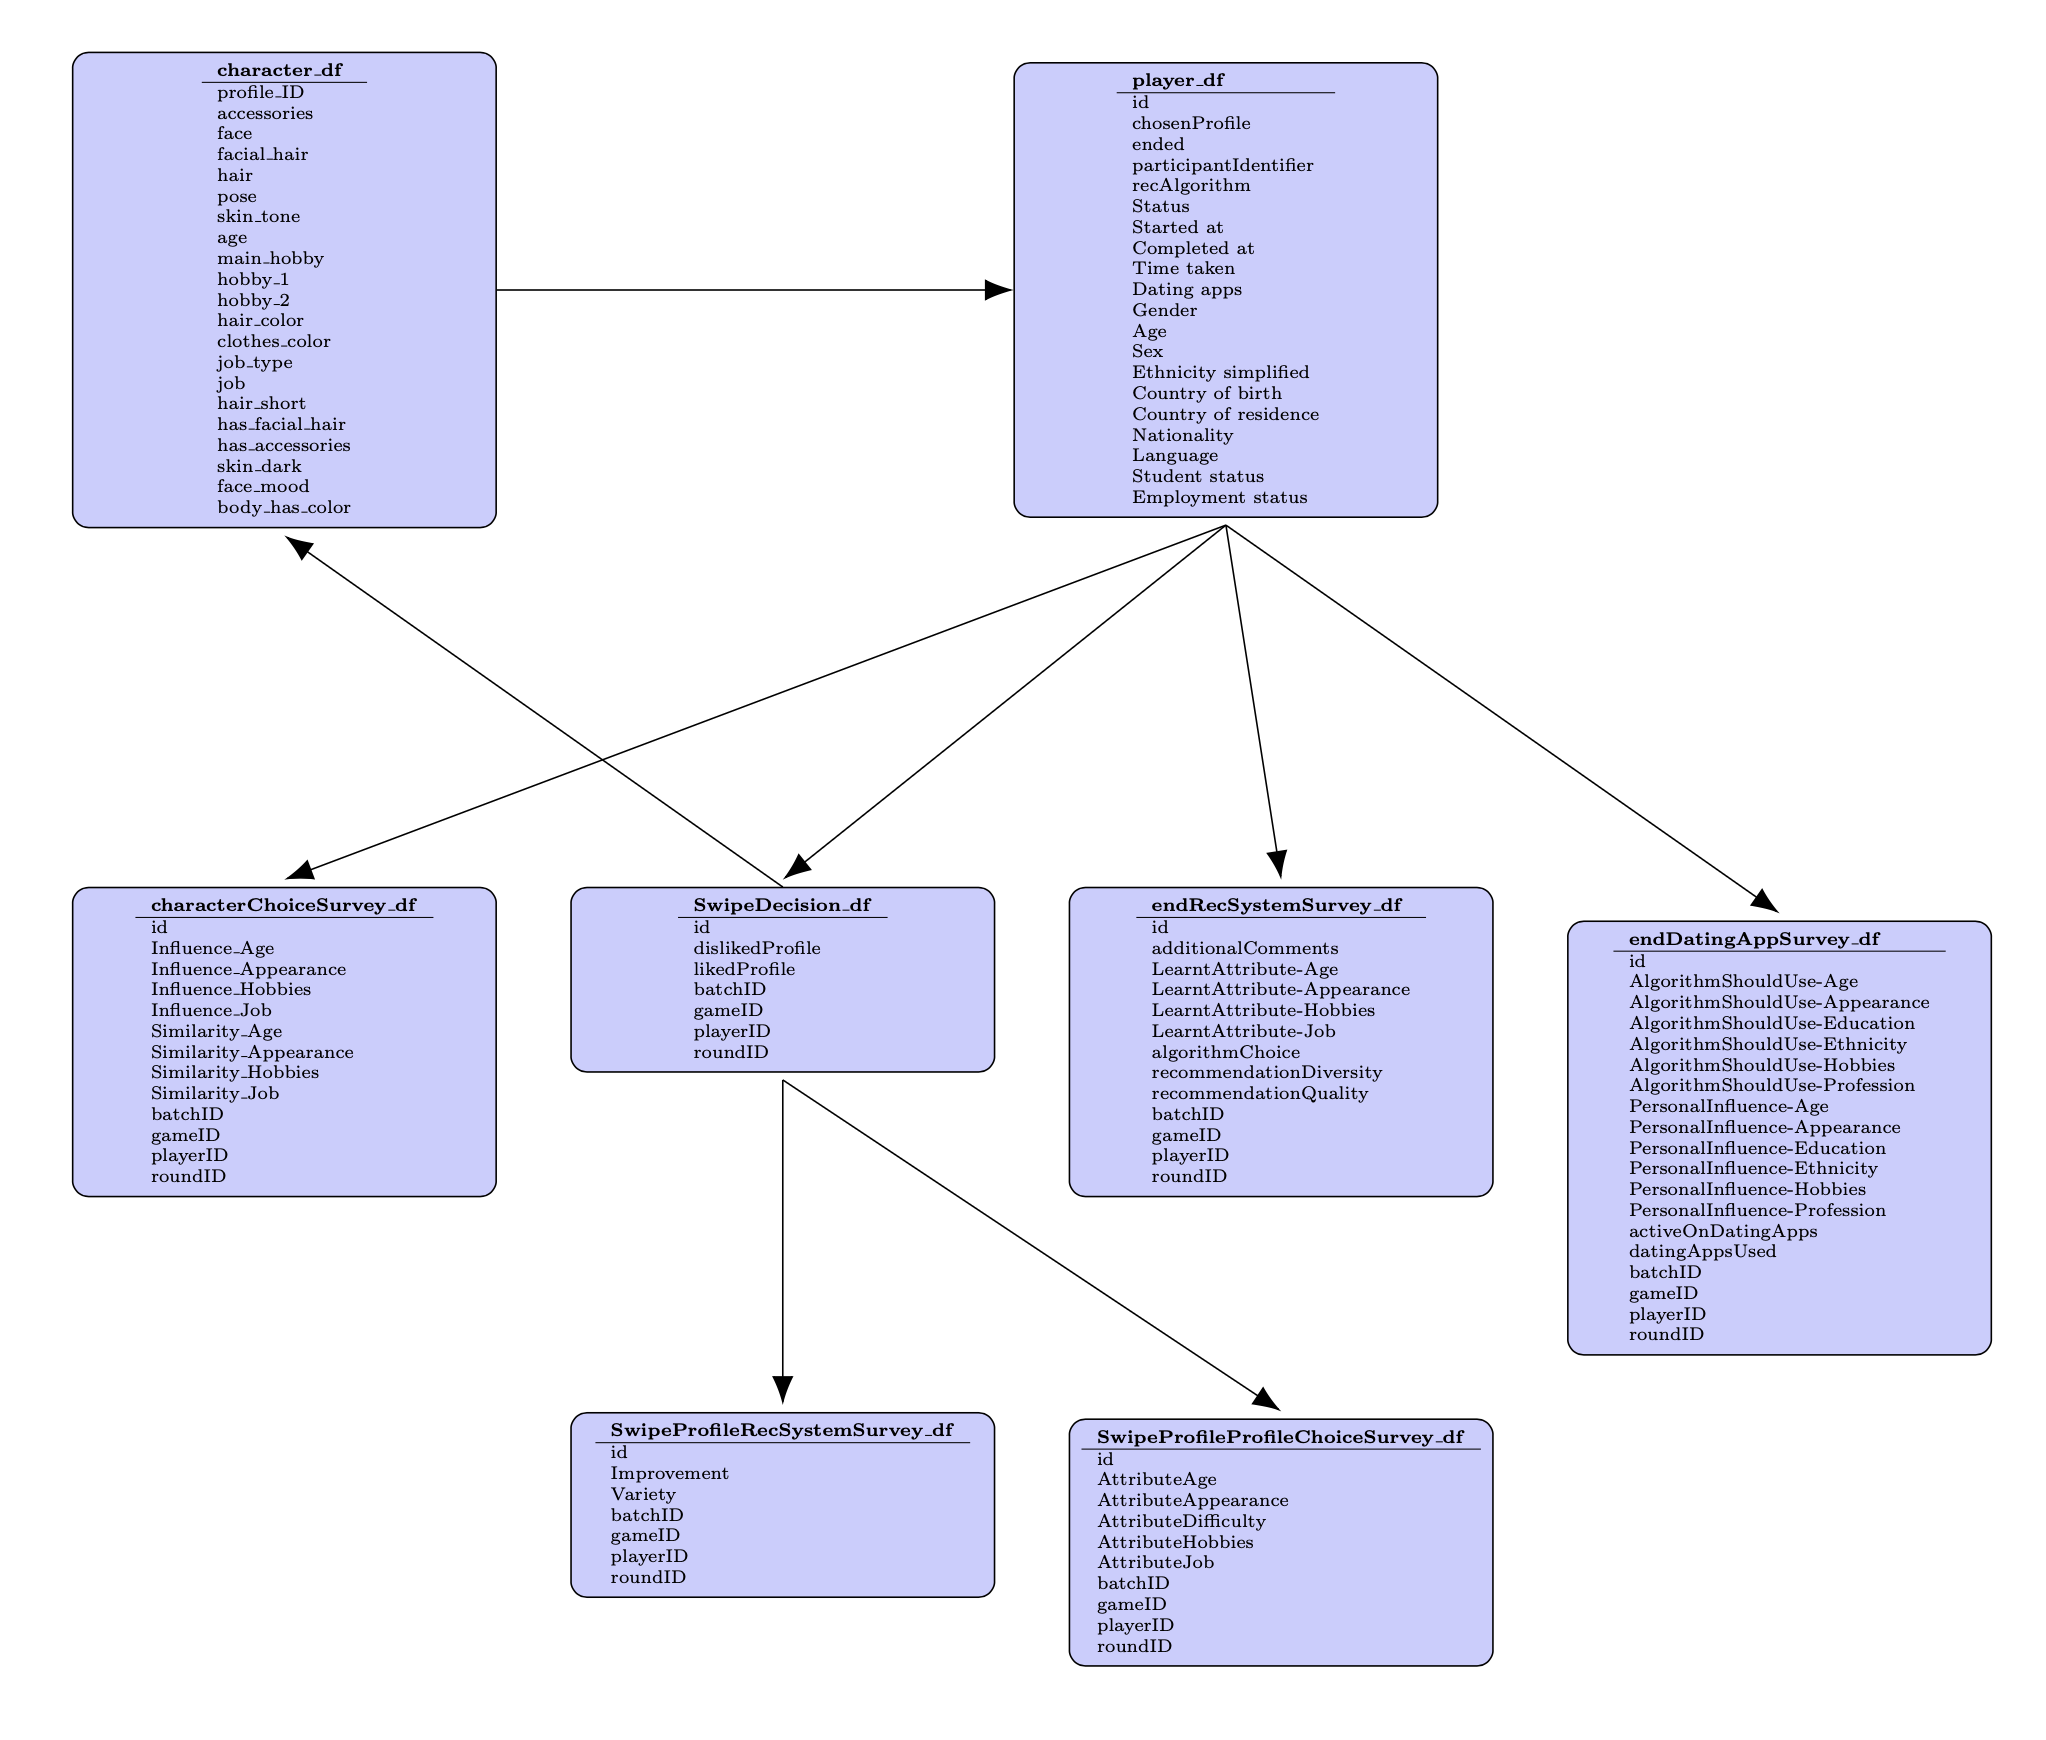

In [57]:
display.Image("ER_Diagram.png")

In [58]:
SwipeDecision_df[SwipeDecision_df['strongPreferenceDetected']==True]

,id,roundsPlayed,dislikedProfile,likedProfile,strongPreferenceDetected,strongPreferences,batchID,gameID,playerID,roundID
0,01J1TR1HBWA0YCE280W5QA1AQ3,16,100,248,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT9BCPBZG5ERGXTEXZV,01J1TQTERTVXPBN1RB1E4KVWQV,01J1TQTNV52EW3B4TYHC3WYEWJ
1,01J1TR7AY5SYQ27XHTWJJW301H,34,222,236,True,"[""noBeard""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQTDR101X78RW058CF7R,01J1TQNANBFZV7M6VRM670890H,01J1TQNP821H2EBMD82PJEAKSC
3,01J1TR898ZC78RADMRK2XW52DZ,36,160,244,True,"[""noBeard""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQTDR101X78RW058CF7R,01J1TQNANBFZV7M6VRM670890H,01J1TQNP821H2EBMD82PJEAKSC
4,01J1TSRNZNS22RVTRHRSC6CPD8,23,106,244,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT4AFY9Y2QS6V17HQ2C,01J1TSBC1JBYGJ3PRK05CRMF3K,01J1TSGN9YTNGTEYV5SKHKV94H
5,01J1TSXMY48JKXGV0S0XXSQWYK,45,110,121,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT4AFY9Y2QS6V17HQ2C,01J1TSBC1JBYGJ3PRK05CRMF3K,01J1TSGN9YTNGTEYV5SKHKV94H
...,...,...,...,...,...,...,...,...,...,...
10539,01J2RX6VA4J3GMSMPVNPGF8ME8,34,161,162,True,"[""noBeard""]",01J2RTGVEZKEVAWEW6YHW6S43F,01J2RTGVKSKQ3FTYGJRSV03ZAN,01J2RWXREATRBCC4A8SYDS1BWC,01J2RWXT631XKMFT0AGXSZP0QM
10543,01J2RW5CV0CC1B85JB2XHBSJ8P,35,41,38,True,"[""longHair""]",01J2RTGVEZKEVAWEW6YHW6S43F,01J2RTGVM1P6E7PMS7DNZ868JQ,01J2RVWFNM9RSZ7WK3J1VZYMD9,01J2RVWHRZK1CYXKWQXYKHCJ6S
10544,01J2RXTNVE3CAM8ZJ8491DA0K2,48,134,150,True,"[""noBeard""]",01J2RTGVEZKEVAWEW6YHW6S43F,01J2RTGVJVAYVKT83Q6YJGCZXW,01J2RWVQ44T6XNKN0KBTR4JZT9,01J2RWW6FPNTXF59GG6NGWFB86
10547,01J2RVSXVZ8W32WF8FSKJV251V,34,158,174,True,"[""noBeard""]",01J2RTGVEZKEVAWEW6YHW6S43F,01J2RTGVJG43F25R12KW7YNFME,01J2RVGS776Z7TFTTC7WW1XX9G,01J2RVGX61SPY1KXR0YSV16SMS


### Making sure there were no recommendation errors:

In [59]:
def count_preferences(pref_string):
    if pd.isna(pref_string):
        return np.nan
    try:
        preferences = ast.literal_eval(pref_string)
        return len(preferences)
    except (ValueError, SyntaxError):
        return np.nan

SwipeDecision_df['number_of_strong_preferences'] = SwipeDecision_df['strongPreferences'].apply(count_preferences)

In [60]:
all_profiles = pd.concat([SwipeDecision_df[['playerID', 'likedProfile']].rename(columns={'likedProfile': 'profileID'}),
                          SwipeDecision_df[['playerID', 'dislikedProfile']].rename(columns={'dislikedProfile': 'profileID'})])
profile_counts = all_profiles.groupby(['playerID', 'profileID']).size().reset_index(name='count')
players_with_duplicates = profile_counts[profile_counts['count'] > 1]['playerID'].unique()
players_with_duplicates = list(players_with_duplicates)

In [61]:
profile_counts[profile_counts['count']>2]

,playerID,profileID,count
20550,01J2RWE8PDF596FM8C39Y4SCK9,68,3
20564,01J2RWE8PDF596FM8C39Y4SCK9,89,3
20590,01J2RWE8PDF596FM8C39Y4SCK9,183,3
20613,01J2RWE8PDF596FM8C39Y4SCK9,246,3


### Open Text Questions:

In [98]:
player_id_random = list(player_df[player_df['recAlgorithm']=='random']['playerID'])
player_id_elo = list(player_df[player_df['recAlgorithm']=='elo']['playerID'])
player_id_bandit = list(player_df[player_df['recAlgorithm']=='siameseBandit']['playerID'])

Random Algorithm Feedback:

In [101]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_random)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_random)]['additionalComments'].notna()]['additionalComments'])

['No',
 'N/a',
 "I initially thought the diversity was good, but i'm not sure if this selection encouraged the algorithm to give me more varied profiles. It ended up too much near the end.",
 'no',
 'It was matching me with men and women.   I would have preferred a choice, and I never saw that option.',
 'no',
 'The recommendations seemed random, sometimes it felt like it is improving but then it would feel very random again.',
 'No',
 'Each time was inconsistent based on the hobbies',
 'It was a bit hit or miss, I purposefully selected profiles with similar hobbies to mine and sometimes it would suggest people with the same hobbies but sometimes it would be something completely random. Same with age and appearance ',
 'na',
 'it was a bit confusing as to the genders of the other candidates. It should learn what type of gender you perfer because in this experiment I assumed my character was Bi in order to consider both choices always. ',
 'dating is really hard, a lot sub-conscious thi

Elo Algorithm Feedback:

In [102]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_elo)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_elo)]['additionalComments'].notna()]['additionalComments'])


['The age difference was too vast. I liked the variety of hobbies and professions.',
 'No',
 "I don't think I was weighing appearance very much because they were cartoons. I think that if they were real people then I would have weighed whether they were attractive as more important than some of the other factors. I believe that people who are similar have stronger relationships, so I was trying to match someone who was similar to my person.",
 "it was weird that it didn't let me choose ages",
 "I did not pay attention to looks as it's hard to discern looks based off my pic and the fact they were cartoonish. I usually found that the choice I made I either liked the job or hobbies and rarely was it both.",
 'This was a very fun survey! The interactivity and algorithmic changes made for an invigorating experience.',
 'This is an interesting study and thanks for letting me participate. It might be helpful to add a "skip" option as sometimes neither fit.\n',
 'the attention checks are unrea

Bandit Algorithm Feedback:

In [104]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_bandit)][endRecSystemSurvey_df[endRecSystemSurvey_df['playerID'].isin(player_id_bandit)]['additionalComments'].notna()]['additionalComments'])


['really interesting experiment as i am on dating sites',
 'Difficult with animated characters to know what makes appearance good or bad. ',
 'Liked the experiment ',
 'I feel that if you are going to design characters and use an algorithm , it would make sense to make the characters resemble the opposite sex. I found it difficult trying to be non judgemental when looking at a assumed female that had a moustache or facial hair.   ',
 'I like that the survey also probes the diversity and quality of the recommendations, asking participants to categorize them as too varied, balanced, or too similar, and to assess their overall quality. I wish the researchers good luck in their quest.']

### What were the demographics of prolific participants?

In [64]:
player_df["Time taken"] = pd.to_numeric(player_df["Time taken"], errors='coerce')
player_df["Age"] = pd.to_numeric(player_df["Age"], errors='coerce')

player_df['Time taken'] = player_df['Time taken'] / 60

continuous_columns = ['Time taken', 'Age']
categorical_columns = [
    'Gender', 'Sex', 'Ethnicity simplified', 'Country of birth', 
    'Country of residence', 'Nationality', 'Language', 'Student status', 
    'Employment status'
]

for column in categorical_columns:
    counts = player_df[column].value_counts()
    rare_values = counts[counts < 5].index
    player_df[column] = player_df[column].apply(lambda x: 'Other' if x in rare_values else x)

continuous_summary = {}
categorical_summaries = {}

for algorithm in player_df['recAlgorithm'].unique():
    continuous_summary[algorithm] = {}
    categorical_summaries[algorithm] = {}
    
    df_alg = player_df[player_df['recAlgorithm'] == algorithm]
    
    for column in continuous_columns:
        continuous_summary[algorithm][column] = {
            'mean': df_alg[column].mean(),
            'median': df_alg[column].median(),
            'max': df_alg[column].max(),
            'min': df_alg[column].min(),
            'std_dev': df_alg[column].std()
        }
    
    for column in categorical_columns:
        categorical_summaries[algorithm][column] = df_alg[column].value_counts().to_dict()

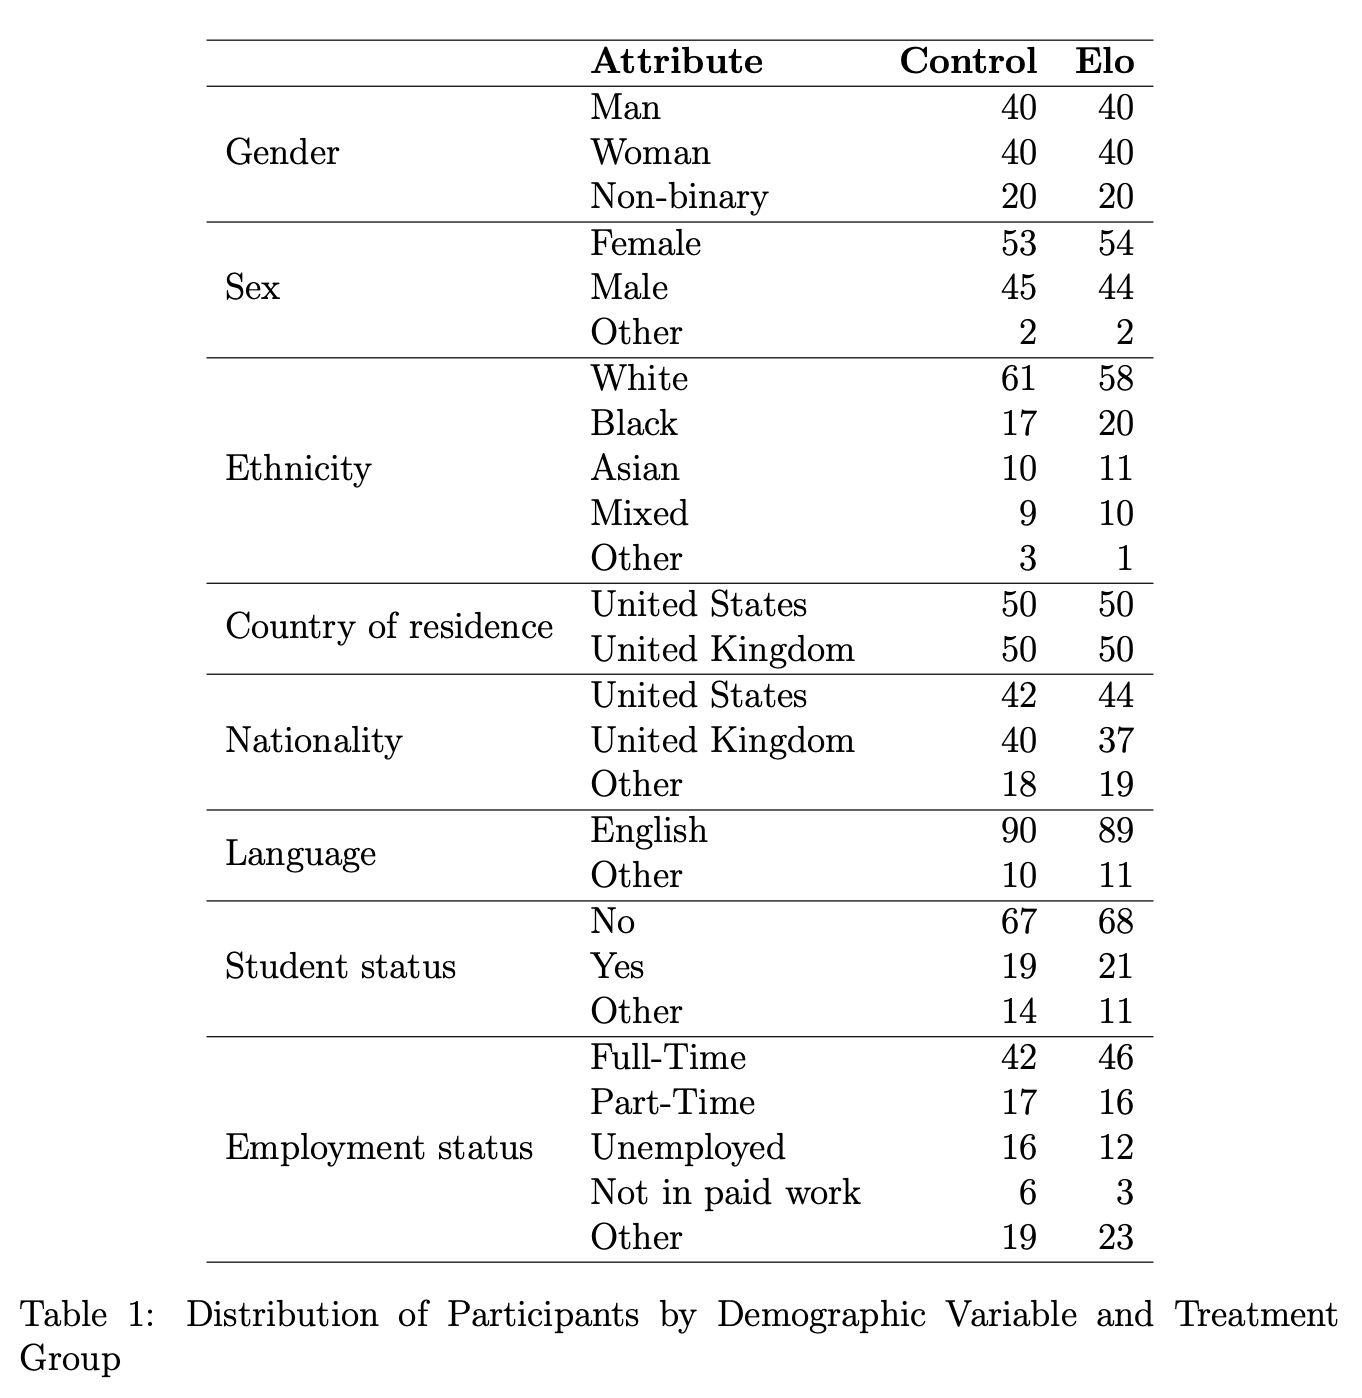

In [65]:
display.Image("Demographic_Info.png")

### What kinds of characters did they pick to play?

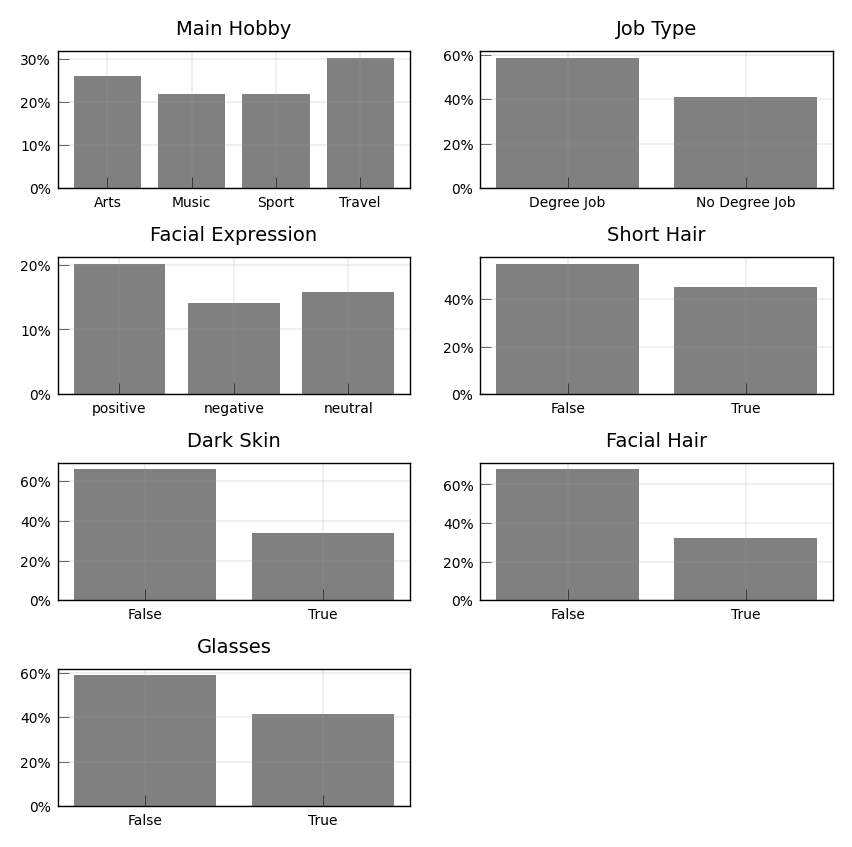

In [66]:
character_df['job_type'] = character_df['job_type'].replace({
    'No Higher Education Job': 'No Degree Job',
    'Higher Education Job': 'Degree Job'
})



merged_df = pd.merge(player_df, character_df, left_on='chosenProfile', right_on='profile_ID')

character_columns = ['main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories']

column_titles = {
    'main_hobby': 'Main Hobby',
    'job_type': 'Job Type',
    'face_mood': 'Facial Expression',
    'hair_short': 'Short Hair',
    'skin_dark': 'Dark Skin',
    'has_facial_hair': 'Facial Hair',
    'has_accessories': 'Glasses'
}

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 5), dpi=200)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0)
    normalized_counts = (normalized_counts / normalized_counts.sum()) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values, color='grey')
    axes[i].set_title(column_titles[column])
    axes[i].set_yticklabels([f'{int(tick)}%' for tick in axes[i].get_yticks()])
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')

fig.delaxes(axes[-1])

plt.subplots_adjust(hspace=0.5)
plt.savefig("visualisations/attributes_of_picked_characters.png")
plt.show()

In [67]:
elo_ranking_df
player_df

,id,chosenProfile,playerID,participantIdentifier,recAlgorithm,ended,feedback,Status,Started at,Completed at,...,Gender,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,01J1TSQS31BWFE92DWSTCGJJTC,202,01J1TSQAXER19SYB115VJTTA76,62b6611f74e3b822f99b90f0,random,game ended,NaN,AWAITING REVIEW,2024-07-02T22:39:59.777000Z,2024-07-02T22:52:03.238000Z,...,Man (including Trans Male/Trans Man),25.0,Male,Asian,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
1,01J1TQTNTJC04RJ0KTWXCP2HMK,0,01J1TQTERTVXPBN1RB1E4KVWQV,6672057f214aef6535843b97,random,game ended,NaN,AWAITING REVIEW,2024-07-02T22:07:23.332000Z,2024-07-02T22:16:36.649000Z,...,Man (including Trans Male/Trans Man),34.0,Male,Asian,India,United States,Other,English,No,Part-Time
2,01J1TRH8Q42WP3P1NSKAZ8CJG7,12,01J1TRGQETB3P9YES33NNMCVAC,6400e75018f82906de24fdac,random,game ended,NaN,AWAITING REVIEW,2024-07-02T22:19:31.249000Z,2024-07-02T22:31:35.560000Z,...,Man (including Trans Male/Trans Man),34.0,Male,Asian,Other,United States,Other,Other,Yes,Unemployed (and job seeking)
3,01J1TRKMJGWR1B0Q1HRHCAP39N,66,01J1TRJG53CGG2S18N88VE78AA,5e1ccb298f3c65054bd232c1,random,game ended,No problems encountered.,AWAITING REVIEW,2024-07-02T22:18:05.578000Z,2024-07-02T22:38:33.429000Z,...,Non-binary (would like to give more detail),37.0,Female,White,United States,United States,United States,English,No,Part-Time
4,01J1TSGN96952NRT5QQ7EXJFNX,179,01J1TSBC1JBYGJ3PRK05CRMF3K,60fe437b48d82d3e7a00cbfb,random,game ended,NaN,AWAITING REVIEW,2024-07-02T22:32:16.607000Z,2024-07-02T22:47:10.323000Z,...,Non-binary (would like to give more detail),25.0,Female,White,United States,United States,United States,English,No,Unemployed (and job seeking)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,01J2RVFP59FFD8YYZ54DAV0QVG,227,01J2RVFDBHV55M3H9G8MHRCSSE,57307b0030a5560010ec7ed0,siameseBandit,game ended,NaN,AWAITING REVIEW,2024-07-14T14:48:28.539000Z,2024-07-14T14:56:39.116000Z,...,Woman (including Trans Female/Trans Woman),40.0,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Part-Time
207,01J2RVWHRC1GYPG98VRDK3YV3D,39,01J2RVWFNM9RSZ7WK3J1VZYMD9,668ea043f4ab05f42227bf77,siameseBandit,game ended,very nice experiment first time. really intera...,AWAITING REVIEW,2024-07-14T14:55:42.131000Z,2024-07-14T15:05:00.238000Z,...,Man (including Trans Male/Trans Man),31.0,Male,White,Other,United Kingdom,Other,Spanish,No,Full-Time
208,01J2RWW6F2TJKF42KPMJ4GFQXD,255,01J2RWVQ44T6XNKN0KBTR4JZT9,666f49e64f37a53ba347bdf0,siameseBandit,game ended,NaN,AWAITING REVIEW,2024-07-14T15:12:34.307000Z,2024-07-14T15:31:55.906000Z,...,Woman (including Trans Female/Trans Woman),22.0,Female,Asian,India,United Kingdom,Other,Other,Yes,Unemployed (and job seeking)
209,01J2RWXT538D9GPDGZDDX88RD3,202,01J2RWXREATRBCC4A8SYDS1BWC,6634e135e21f434b89972882,siameseBandit,game ended,NaN,AWAITING REVIEW,2024-07-14T15:13:49.384000Z,2024-07-14T15:22:44.816000Z,...,Man (including Trans Male/Trans Man),25.0,Male,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time


In [68]:
player_df.columns

Index(['id', 'chosenProfile', 'playerID', 'participantIdentifier',
       'recAlgorithm', 'ended', 'feedback', 'Status', 'Started at',
       'Completed at', 'Time taken', 'Dating apps', 'Gender', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [69]:
elo_ranking_df.columns

Index(['Profile', 'Elo Rating'], dtype='object')

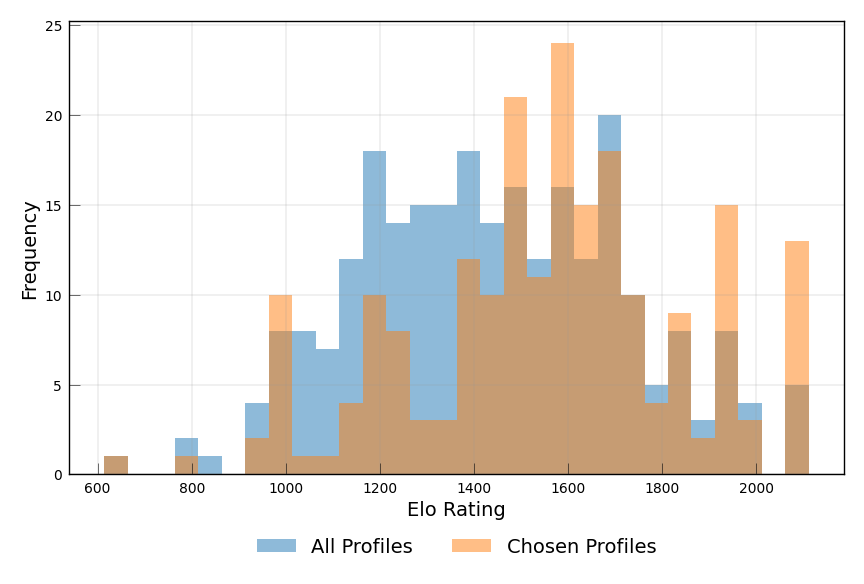

In [70]:
merged_df = player_df.merge(elo_ranking_df, left_on='chosenProfile', right_on='Profile')

all_elo_ratings = elo_ranking_df['Elo Rating']
chosen_elo_ratings = merged_df['Elo Rating']

plt.figure(figsize=(5, 3), dpi=200)

plt.hist(all_elo_ratings, bins=30, alpha=0.5, label='All Profiles')
plt.hist(chosen_elo_ratings, bins=30, alpha=0.5, label='Chosen Profiles')

plt.xlabel('Elo Rating')
plt.ylabel('Frequency')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig("visualisations/elo_of_ell_vs_picked_characters.png")
plt.show()

### What attributes influenced them to pick the character? In which attributes do they consider themselves to be similar to their character?

Survey Questions: 
- Check whether the character you chose is similar to you or not
- How much did each characteristic influence your decision to choose this character?

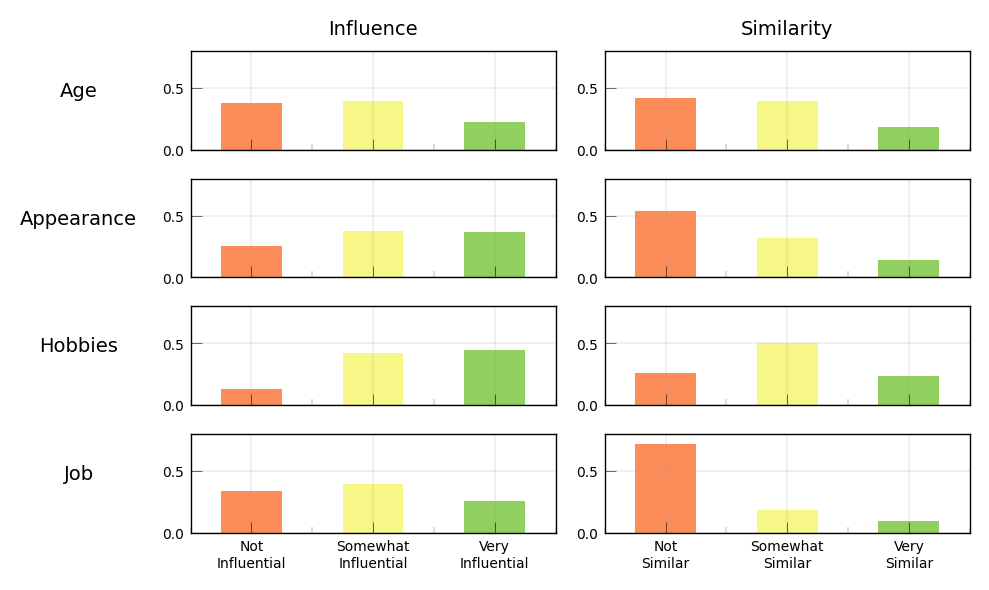

In [71]:
influence_columns = [col for col in characterChoiceSurvey_df.columns if 'Influence' in col]
similarity_columns = [col for col in characterChoiceSurvey_df.columns if 'Similarity' in col]
influence_categories = ['notInfluential', 'somewhatInfluential', 'veryInfluential']
similarity_categories = ['notSimilar', 'somewhatSimilar', 'verySimilar']

influence_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}
similarity_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(similarity_categories, fill_value=0) for col in similarity_columns}
fig, axs = plt.subplots(len(influence_columns), 2, figsize=(5, 3), sharex='col', dpi=200)

colors = ['#fc8d59', '#f7f788', '#91cf60']

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors, legend=False)
    axs[row, 0].set_ylabel(col.replace('_', ' ').replace('Influence ', ''), rotation=0, labelpad=30)
    axs[row, 0].set_xlabel('')
    if row == len(influence_columns) - 1:  
        axs[row, 0].set_xticklabels(['Not\nInfluential', 'Somewhat\nInfluential', 'Very\nInfluential'], rotation=0)
    axs[row, 0].set_ylim(0, 0.8)

for row, (col, counts) in enumerate(similarity_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors, legend=False)
    axs[row, 1].set_ylabel('')
    axs[row, 1].set_xlabel('')
    if row == len(similarity_columns) - 1: 
        axs[row, 1].set_xticklabels(['Not\nSimilar', 'Somewhat\nSimilar', 'Very\nSimilar'], rotation=0)
    axs[row, 1].set_ylim(0, 0.8)

axs[0, 0].set_title('Influence')
axs[0, 1].set_title('Similarity')

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.9)

plt.savefig("visualisations/survey_influence_vs_similarity_when_picking_character.png")

plt.show()


To Do:
calculate correlation between similarity and influence

### Which types of characters did they like/dislike during swiping?

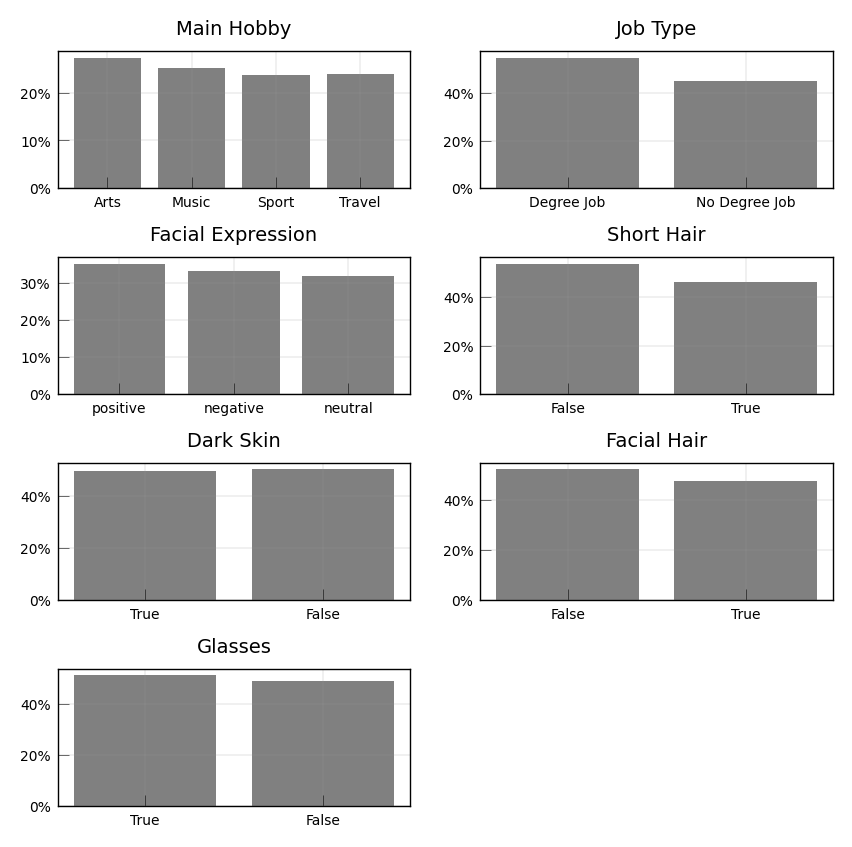

In [72]:
merged_df = pd.merge(SwipeDecision_df, character_df, left_on='likedProfile', right_on='profile_ID')
character_columns = ['main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories']

column_titles = {
    'main_hobby': 'Main Hobby',
    'job_type': 'Job Type',
    'face_mood': 'Facial Expression',
    'hair_short': 'Short Hair',
    'skin_dark': 'Dark Skin',
    'has_facial_hair': 'Facial Hair',
    'has_accessories': 'Glasses'
}

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 5), dpi=200)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0)
    normalized_counts = (normalized_counts / normalized_counts.sum()) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values, color='grey')
    axes[i].set_title(column_titles[column])
    axes[i].set_yticklabels([f'{int(tick)}%' for tick in axes[i].get_yticks()])
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')

fig.delaxes(axes[-1])

plt.subplots_adjust(hspace=0.5)
plt.savefig("visualisations/attributes_of_liked_characters.png")
plt.show()

### Which types of characters were they recommended?

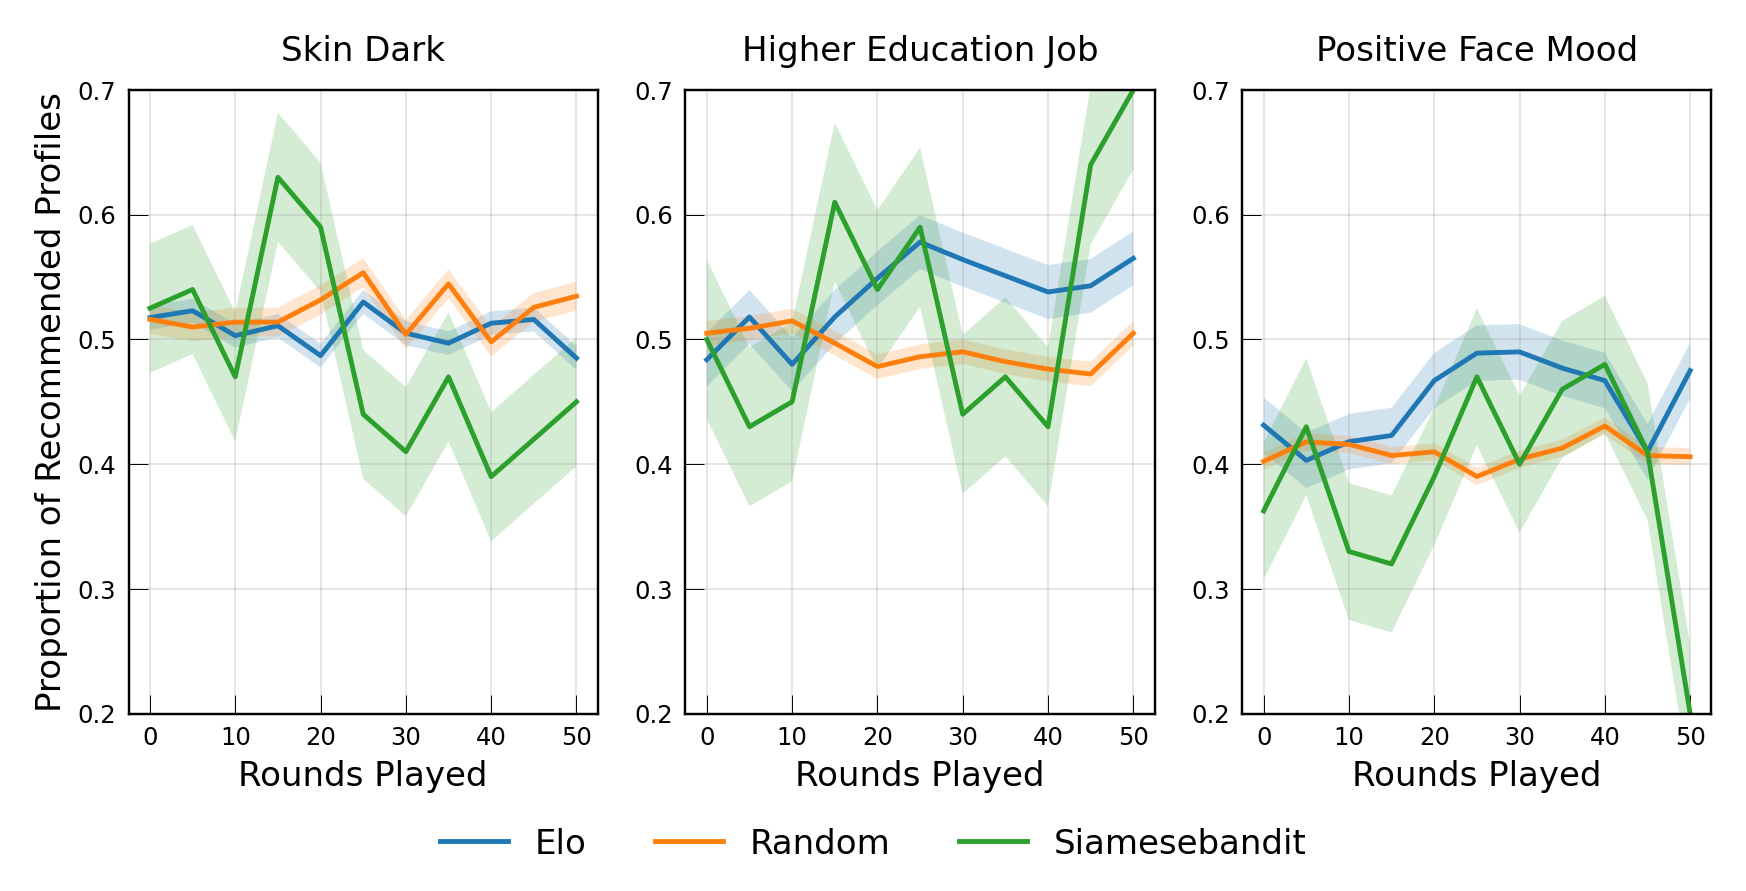

In [120]:
def bin_rounds(roundsPlayed, bin_size=5):
    return np.floor(roundsPlayed / bin_size) * bin_size

disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID', suffixes=('', '_disliked'))
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID', suffixes=('', '_liked'))
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')

# Binning roundsPlayed
combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

proportions = combined_profiles.groupby(['recAlgorithm', 'binned_rounds']).apply(lambda x: pd.Series({
    'proportion_skin_dark': x['skin_dark'].mean(),
    'proportion_higher_education_job': (x['job_type'] == 'Degree Job').mean(),
    'proportion_positive_mood': (x['face_mood'] == 'positive').mean()
})).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(5, 2.5), dpi=350)

plot_params = [
    ('proportion_skin_dark', 'Skin Dark'),
    ('proportion_higher_education_job', 'Higher Education Job'),
    ('proportion_positive_mood', 'Positive Face Mood')
]

for ax, (y, title) in zip(axes, plot_params):
    for algo in proportions['recAlgorithm'].unique():
        data = proportions[proportions['recAlgorithm'] == algo]
        x = data['binned_rounds']
        y_vals = data[y]
        y_err = stats.sem(y_vals) * stats.t.ppf((1 + 0.95) / 2., len(y_vals)-1)
        
        ax.plot(x, y_vals, label=algo)
        ax.fill_between(x, y_vals - y_err, y_vals + y_err, alpha=0.2)
    
    ax.set_title(title)
    ax.set_xlabel('Rounds Played')
    ax.set_ylabel('')
    ax.set_ylim(0.2, 0.7)

axes[0].set_ylabel('Proportion of Recommended Profiles')

for ax in axes:
    ax.legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig("visualisations/attributes_of_recommended_characters.png")

plt.show()


### In what features were they similar to the characters they were recommended?

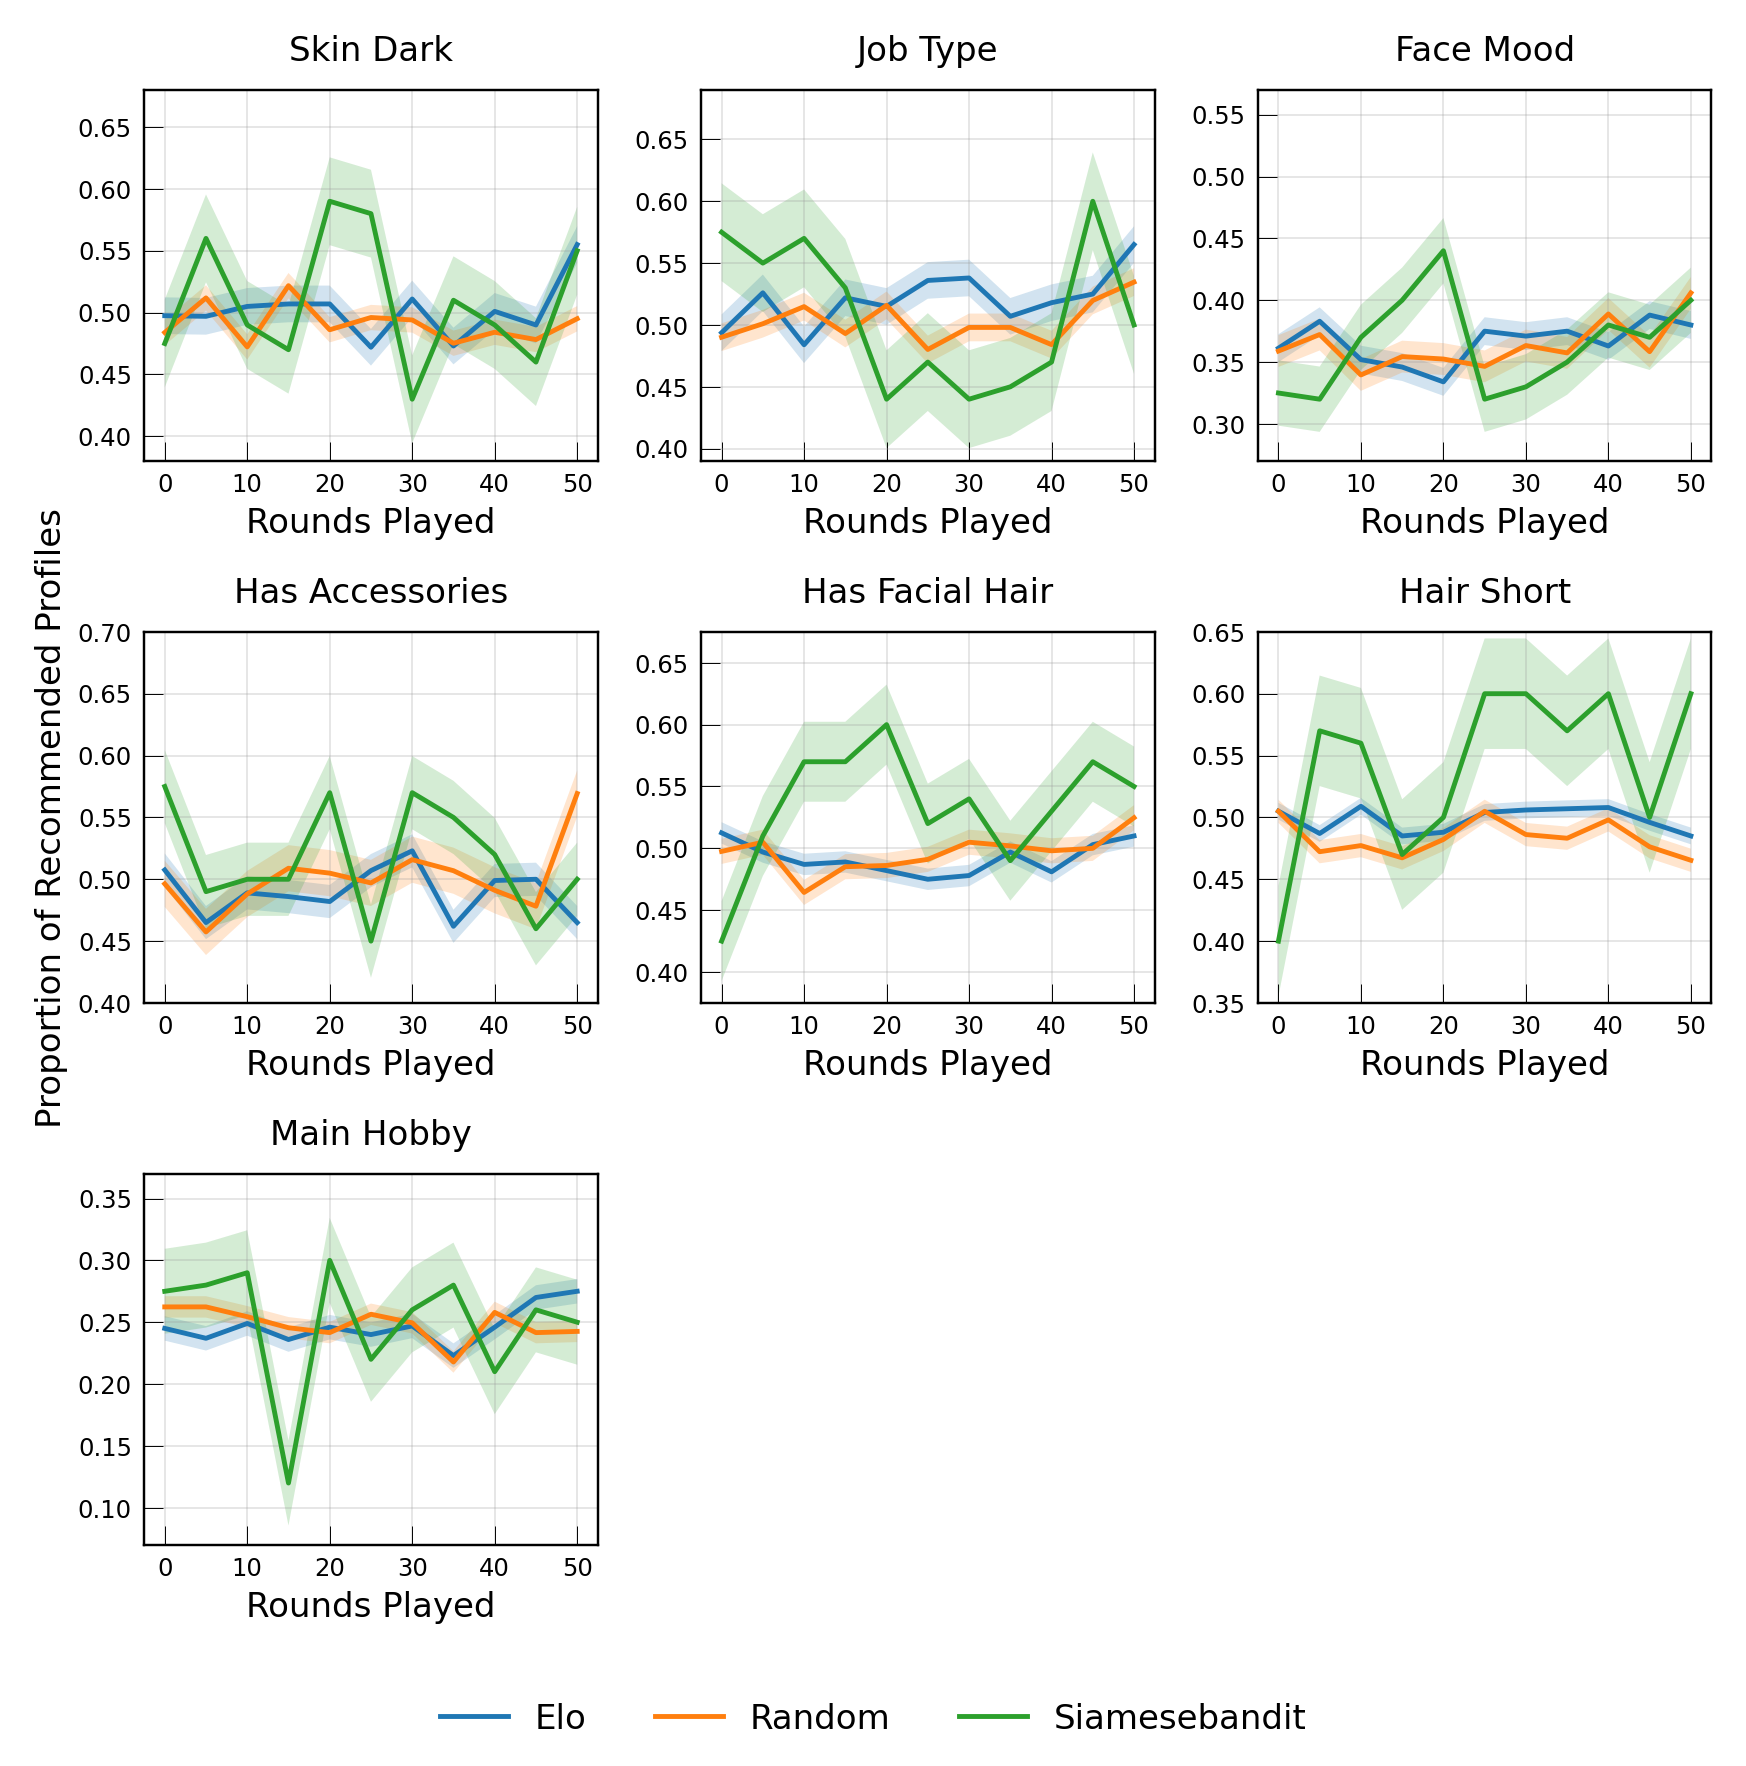

In [115]:
def bin_rounds(roundsPlayed, bin_size=5):
    return np.floor(roundsPlayed / bin_size) * bin_size

disliked_profiles = SwipeDecision_df.merge(character_df, left_on='dislikedProfile', right_on='profile_ID')
liked_profiles = SwipeDecision_df.merge(character_df, left_on='likedProfile', right_on='profile_ID')
combined_profiles = pd.concat([disliked_profiles, liked_profiles])
combined_profiles = combined_profiles.merge(player_df, left_on='playerID', right_on='playerID')
chosen_profiles = player_df.merge(character_df, left_on='chosenProfile', right_on='profile_ID')

attributes = ['skin_dark', 'job_type', 'face_mood', 'has_accessories', 'has_facial_hair', 'hair_short', 'main_hobby']
chosen_attributes = [attr + '_chosen' for attr in attributes]
combined_profiles = combined_profiles.merge(
    chosen_profiles[['playerID'] + attributes],
    on='playerID',
    suffixes=('', '_chosen')
)

combined_profiles['binned_rounds'] = bin_rounds(combined_profiles['roundsPlayed'])

proportions = combined_profiles.groupby(['recAlgorithm', 'binned_rounds']).apply(lambda x: pd.Series({
    f'proportion_{attr}': (x[attr] == x[f'{attr}_chosen']).mean() for attr in attributes
})).reset_index()

num_attributes = len(attributes)
num_rows = (num_attributes + 2) // 2

fig, axes = plt.subplots(3, 3, figsize=(5, 5), dpi=350)
axes = axes.flatten()

for i, attr in enumerate(attributes):
    for algo in proportions['recAlgorithm'].unique():
        data = proportions[proportions['recAlgorithm'] == algo]
        x = data['binned_rounds']
        y_vals = data[f'proportion_{attr}']
        y_err = stats.sem(y_vals) * stats.t.ppf((1 + 0.95) / 2., len(y_vals)-1)

        axes[i].plot(x, y_vals, label=algo)
        axes[i].fill_between(x, y_vals - y_err, y_vals + y_err, alpha=0.2)
    
    axes[i].set_title(f'{attr.replace("_", " ").title()}')
    axes[i].set_xlabel('Rounds Played')
    
    if i == 3:
        axes[i].set_ylabel('Proportion of Recommended Profiles')
    else:
        axes[i].set_ylabel('')
    
    min_value = proportions[f'proportion_{attr}'].min() - 0.05
    y_min = min_value
    y_max = y_min + 0.3
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("visualisations/similarity_of_recommended_vs_picked_character.png")

plt.show()


### How does their level or bias correlate with what they are shown?

In [ ]:
# preference dictionary for each player
# level of preference my trait on y-achsis
# amount of recommendations with trait on x-achsis



### How many 'matches' (both characters liked each other)

In [118]:
Swipes_with_matches = SwipeDecision_df.merge(player_df[['chosenProfile', 'playerID', 'recAlgorithm']], how = 'left', on = 'playerID')
Swipes_with_matches = Swipes_with_matches[Swipes_with_matches['likedProfile'].isin(list(player_df['chosenProfile']))]
player_df['chosenProfile'] = player_df['chosenProfile'].astype(int)
reverse_pairs = Swipes_with_matches[['chosenProfile', 'likedProfile']].copy()
reverse_pairs.columns = ['likedProfile', 'chosenProfile']
merged_df = Swipes_with_matches.merge(reverse_pairs, on=['chosenProfile', 'likedProfile'], how='left', indicator='match_ind')
merged_df['match'] = merged_df['match_ind'] == 'both'
Swipes_with_matches = Swipes_with_matches.merge(merged_df[['id', 'match']], on = 'id', how = 'left')

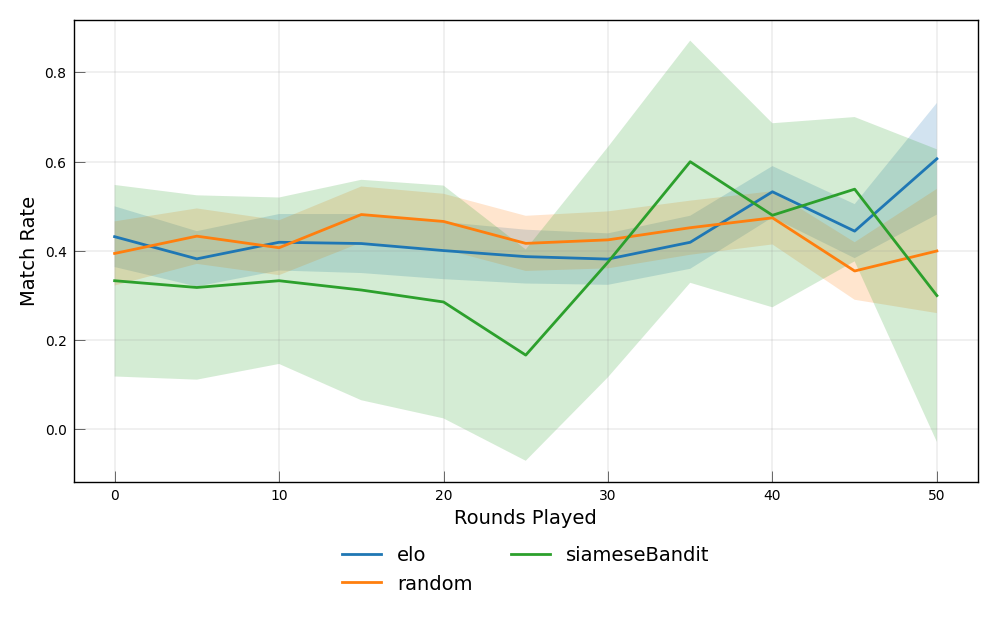

In [119]:
bin_size = 5
Swipes_with_matches['rounds_bin'] = (Swipes_with_matches['roundsPlayed'] // bin_size) * bin_size

match_rate_df = Swipes_with_matches.groupby(['recAlgorithm', 'rounds_bin']).agg(
    match_count=('match', 'sum'),
    total=('match', 'count')
).reset_index()

match_rate_df['match_rate'] = match_rate_df['match_count'] / match_rate_df['total']

# Calculate standard error and confidence interval
match_rate_df['std_err'] = np.sqrt(match_rate_df['match_rate'] * (1 - match_rate_df['match_rate']) / match_rate_df['total'])
match_rate_df['ci95'] = match_rate_df['std_err'] * stats.t.ppf((1 + 0.95) / 2., match_rate_df['total'] - 1)

plt.figure(figsize=(5, 3.5), dpi=200)

for rec_algo in match_rate_df['recAlgorithm'].unique():
    subset = match_rate_df[match_rate_df['recAlgorithm'] == rec_algo]
    plt.plot(subset['rounds_bin'], subset['match_rate'], label=rec_algo)
    plt.fill_between(subset['rounds_bin'], subset['match_rate'] - subset['ci95'], subset['match_rate'] + subset['ci95'], alpha=0.2)

plt.xlabel('Rounds Played')
plt.ylabel('Match Rate')
plt.legend(title='', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("visualisations/number_of_matches_by_alg.png")
plt.show()

### Average Elo of recommendation

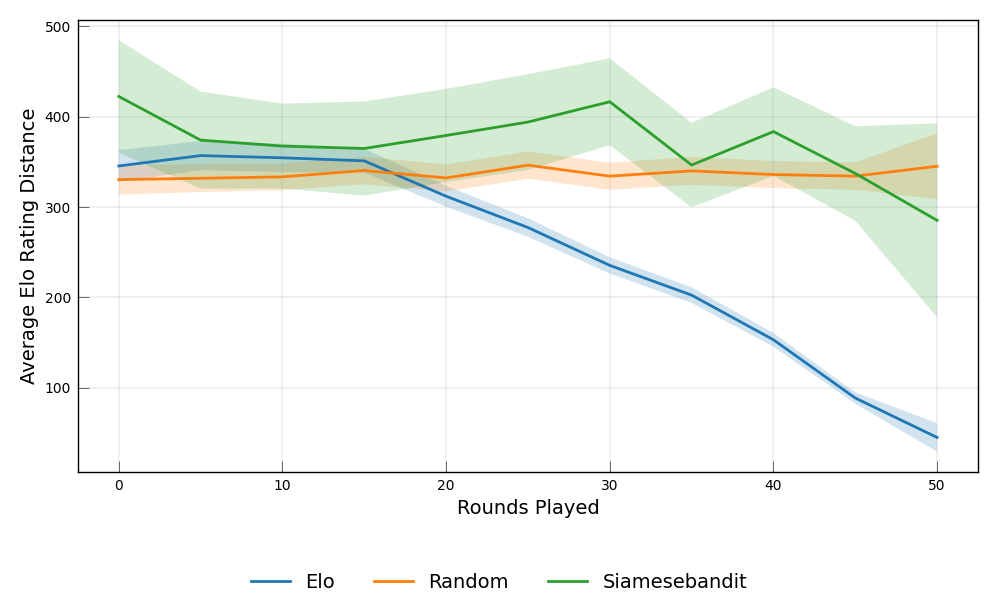

In [77]:
disliked_profiles = SwipeDecision_df.merge(elo_ranking_df, left_on='dislikedProfile', right_on='Profile', suffixes=('', '_disliked'))
liked_profiles = SwipeDecision_df.merge(elo_ranking_df, left_on='likedProfile', right_on='Profile', suffixes=('', '_liked'))

combined_profiles_elo = pd.concat([disliked_profiles, liked_profiles])

combined_profiles_elo = combined_profiles_elo.merge(player_df, left_on='playerID', right_on='playerID')

chosen_profiles = player_df.merge(elo_ranking_df, left_on='chosenProfile', right_on='Profile', suffixes=('', '_chosen'))

combined_profiles_elo = combined_profiles_elo.merge(
    chosen_profiles[['playerID', 'chosenProfile', 'Elo Rating']],
    on='playerID',
    suffixes=('', '_chosen')
)

combined_profiles_elo['elo_distance'] = combined_profiles_elo.apply(
    lambda row: abs(row['Elo Rating'] - row['Elo Rating_chosen']),
    axis=1
)

combined_profiles_elo['binned_rounds'] = bin_rounds(combined_profiles_elo['roundsPlayed'])

average_elo_distance = combined_profiles_elo.groupby(['recAlgorithm', 'binned_rounds']).agg(
    average_elo_distance=('elo_distance', 'mean'),
    count=('elo_distance', 'count')
).reset_index()

# Calculate standard error and confidence interval
average_elo_distance['std_err'] = combined_profiles_elo.groupby(['recAlgorithm', 'binned_rounds'])['elo_distance'].sem().reset_index(drop=True)
average_elo_distance['ci95'] = average_elo_distance['std_err'] * stats.t.ppf((1 + 0.95) / 2., average_elo_distance['count'] - 1)

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

for rec_algo in average_elo_distance['recAlgorithm'].unique():
    subset = average_elo_distance[average_elo_distance['recAlgorithm'] == rec_algo]
    ax.plot(subset['binned_rounds'], subset['average_elo_distance'], label=rec_algo)
    ax.fill_between(subset['binned_rounds'], subset['average_elo_distance'] - subset['ci95'], subset['average_elo_distance'] + subset['ci95'], alpha=0.2)

plt.title('')
plt.xlabel('Rounds Played')
plt.ylabel('Average Elo Rating Distance')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, [label.capitalize() for label in labels], loc='lower center', ncol=len(labels), title='')

plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.savefig("visualisations/elo_disparity_between_recommended_and_own_character.png")

plt.show()

### Which attributes did they say made them pick one character over another during swiping?

Survey Question"
 - For each of the following profile characteristics, indicate whether the chosen character was better, both were about the same, or the other character was better.

In [78]:
filtered_algorithm_df

,id,attentionCheck,AttributeAge,AttributeAppearance,AttributeDifficulty,AttributeHobbies,AttributeJob,batchID,gameID,playerID,roundID,recAlgorithm,roundsPlayed
505,01J27QSKGCGEWVKH3Y79E53QR1,attentionAgeIsSame,chosenBetter,chosenBetter,chosenBetter,chosenBetter,chosenBetter,01J27M157EHX83K0V5FHS43J6K,01J27M15C0D9W6GH0E9VJARGB2,01J27PFBFH8PHKH5ZQZ6D4EQKR,01J27PMTRACHXWVAX4ZKDA4854,elo,45
506,01J27N9MS5BVR49KZT5ZKPE9XA,None,chosenBetter,chosenBetter,random,chosenBetter,same,01J27M157EHX83K0V5FHS43J6K,01J27M15DA65MPZTE98FJNCE7V,01J27MTN2T9ZZWTC98Y03J86NQ,01J27MTV6NHEP27VMVMNEXWMB0,elo,35
508,01J27R1PM2EWQ4EA4TYDGM4CXX,attentionAgeIsSame,chosenBetter,notChosenBetter,chosenBetter,chosenBetter,chosenBetter,01J27M157EHX83K0V5FHS43J6K,01J27M15ASG4F5EZZK4QGH4FBK,01J27QE37KY250D501MERNFWCR,01J27QEBPW436QP6W2MD7BHP6N,elo,45
511,01J27PWDDTQ3G7VFTF7DXNHC03,attentionAgeIsSame,same,same,chosenBetter,chosenBetter,notChosenBetter,01J27M157EHX83K0V5FHS43J6K,01J27M15C1N2TV6C1V4S5HC1J9,01J27P97PJF0WQD6V4Y2CEM6B9,01J27P9J1WGQNJCARNEXQSYV97,elo,45
512,01J27PZ17SKDA0D0X4WFFM0XHE,None,chosenBetter,chosenBetter,chosenBetter,same,same,01J27M157EHX83K0V5FHS43J6K,01J27M15D5BY868VBZJRP9JWG6,01J27PHPDH5ZFJB1JFBBG6YQ45,01J27PJ79RWS47T1FPN29E5CM6,elo,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,01J2721Q2QPACHV1PGHQFXFW5E,None,chosenBetter,same,neitherGood,same,same,01J26X3H5G77KC3HMKYBH5YPR6,01J26X3HA3XNYPQ3YRN3GXE9QF,01J271R51CSEHFJSJ3V52VSSEY,01J271RFYF1536HX4EJ073VSZ7,elo,35
997,01J270P2E8V69JG7275P4ZCYTX,None,chosenBetter,chosenBetter,chosenBetter,chosenBetter,chosenBetter,01J26X3H5G77KC3HMKYBH5YPR6,01J26X3HADAZ57ZFGBKVTQ1MTT,01J26ZQ40JPW5ERRNZDY1ZQQ6X,01J26ZRJ5DJXQA4GMD84C593CR,elo,35
998,01J272RK89TRFYKKGQ68C04BCJ,None,same,chosenBetter,chosenBetter,chosenBetter,notChosenBetter,01J26X3H5G77KC3HMKYBH5YPR6,01J26X3HAN962DY32HHXTCJXHH,01J272DXDF6T58FAWTN4TASV6S,01J272E67SYZCZB6C2YQWV34XK,elo,35
1000,01J279ZQPTF20SQ981EV814AZF,attentionAgeIsSame,same,chosenBetter,bothGood,same,same,01J278EVQA66C75Z7H18EV0EK9,01J278EVRJ1ZJSACFNPSGP3BRN,01J2792SM08D5G38D4MVHXWVFY,01J2793C6089SBZN2MN4Q4792H,elo,45


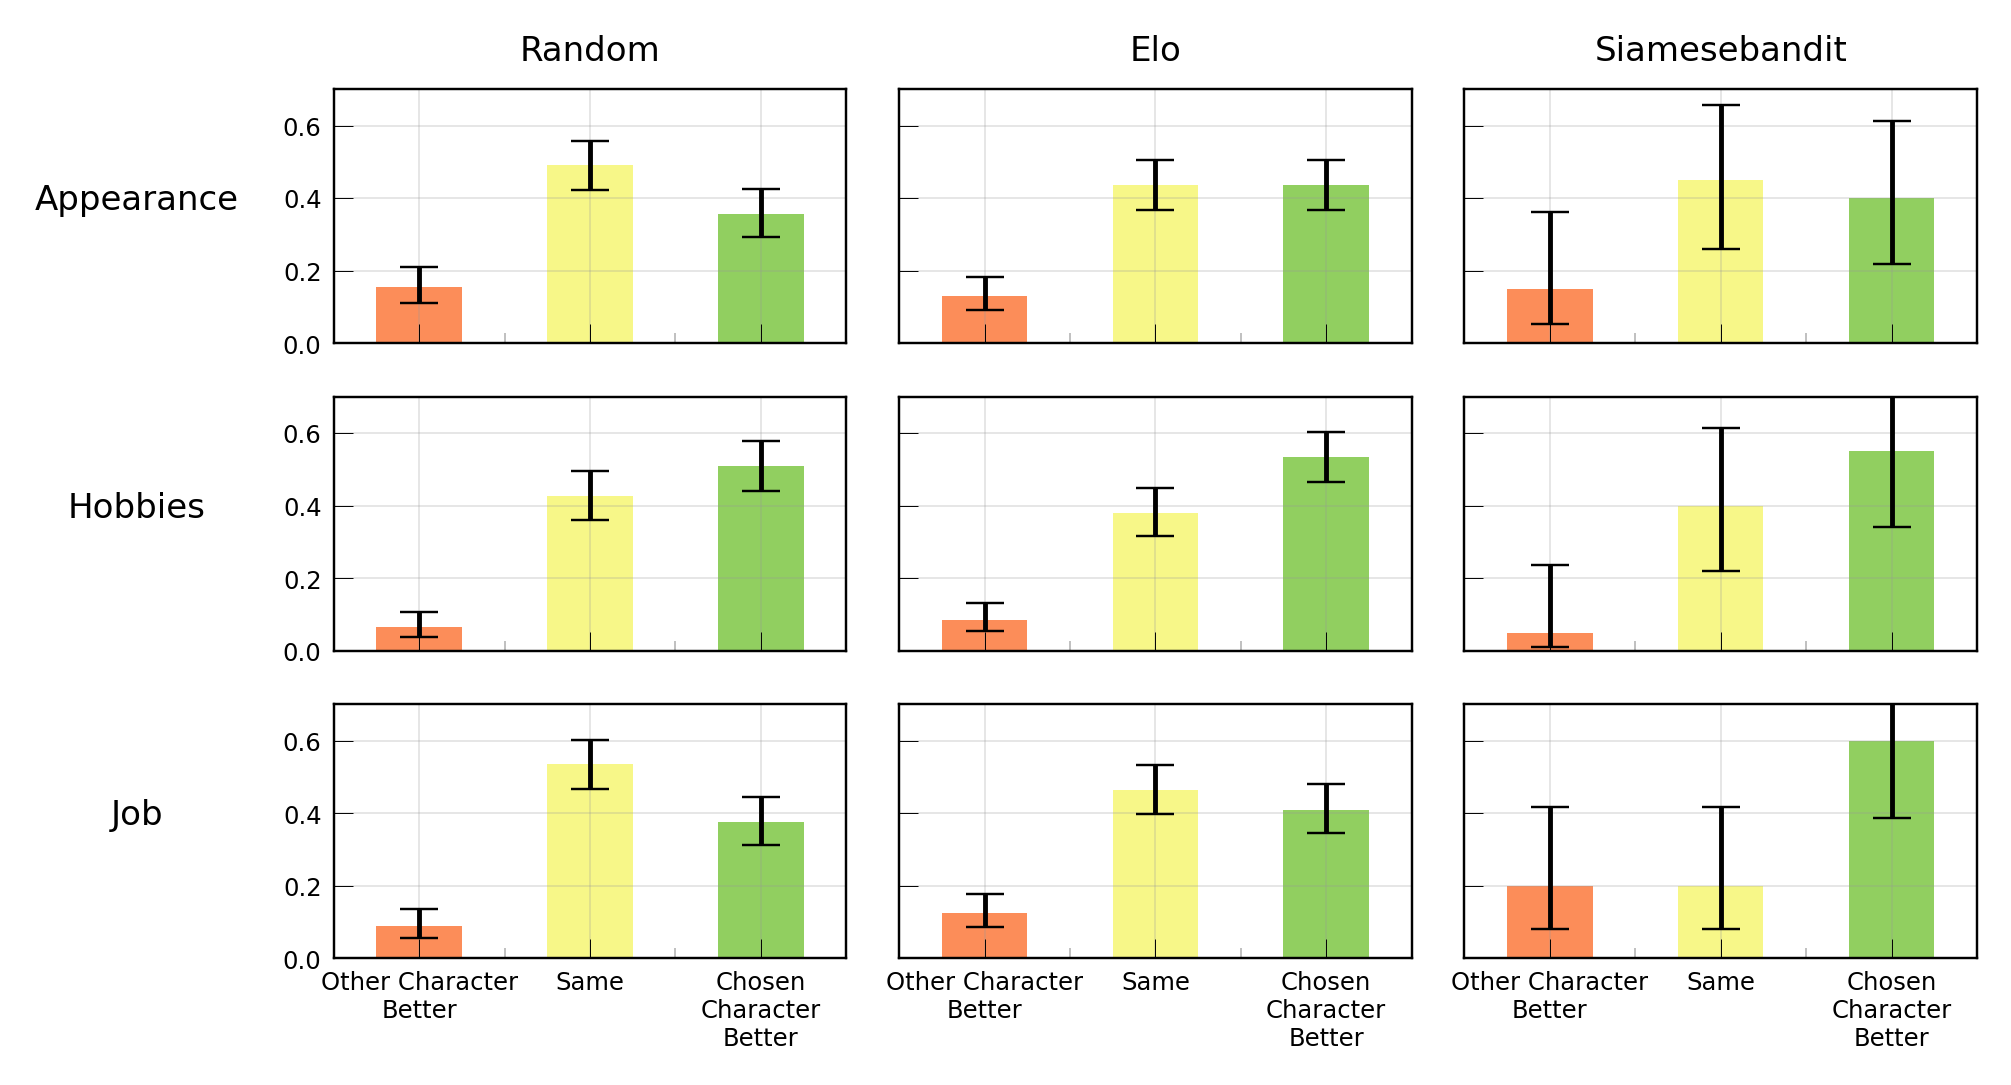

In [113]:
merged_df = SwipeProfileProfileChoiceSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')
merged_df = merged_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id')
merged_df = merged_df[merged_df['roundsPlayed']>30]

attribute_columns = ['AttributeAppearance', 'AttributeHobbies', 'AttributeJob']
attribute_categories = ['notChosenBetter', 'same', 'chosenBetter']

filtered_df = merged_df#[merged_df['attentionCheck'] != 'attentionAgeIsSame']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60']

fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(6, 3), sharex=True, dpi=350)

attribute_categories_improved = ['Other Character Better', 'Same', 'Chosen Character Better']
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=15)) for label in attribute_categories_improved]

def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

for col_idx, col in enumerate(attribute_columns):
    for row_idx, algorithm in enumerate(rec_algorithms):
        ax = axes[col_idx, row_idx]
        filtered_algorithm_df = filtered_df[filtered_df['recAlgorithm'] == algorithm]
        
        counts = filtered_algorithm_df[col].value_counts(normalize=False).reindex(attribute_categories, fill_value=0)
        proportions = counts / counts.sum()
        
        ci_lower = []
        ci_upper = []
        for count in counts:
            lower, upper = wilson_score_interval(count, counts.sum())
            ci_lower.append(lower)
            ci_upper.append(upper)
        
        errors = np.array([proportions - ci_lower, ci_upper - proportions])
        
        proportions.plot(kind='bar', ax=ax, color=colors, yerr=errors, capsize=4, legend=False)
        ax.set_xlabel('')
        ax.set_xticklabels(wrapped_labels, rotation=0)
        ax.set_ylim(0, 0.7)
        if col_idx == 0:
            ax.set_title(f'{algorithm}'.capitalize())
        if row_idx == 0:
            ax.set_ylabel(col.replace('Attribute', ''), rotation=0, labelpad=30)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.95)

plt.savefig("visualisations/survey_45_round_attributes_in_which_char_was_better.png")

plt.show()

### How did the perceived difficulty of their choice change during the experiment?

Survey Question:
 - How well do the recommended characters fit with your character?

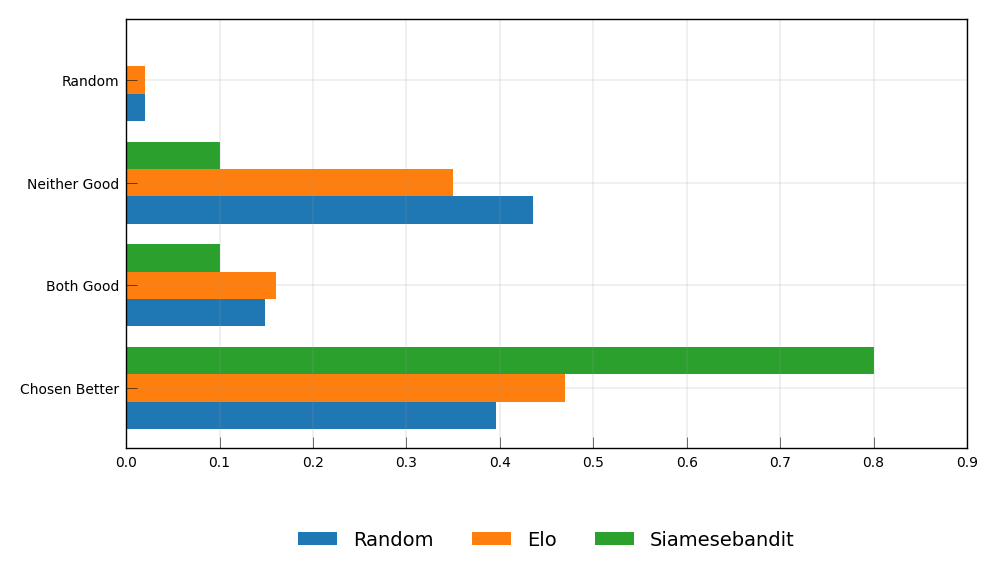

In [112]:
merged_df = SwipeProfileProfileChoiceSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')
merged_df = merged_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id')
merged_df = merged_df[merged_df['roundsPlayed']>40]


# merged_df = merged_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'AttributeDifficulty'
choice_categories = [
    'chosenBetter', 
    'bothGood',
    'neitherGood', 
    'random'
]

adjusted_labels = [
    'Chosen Better',
    'Both Good',
    'Neither Good',
    'Random'
]

rec_algorithms = merged_df['recAlgorithm'].unique()

grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        label=algorithm
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(adjusted_labels, rotation=0)
ax.set_xlim(0, 0.9)

ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/survey_45_round_fit_of_character.png")
plt.show()

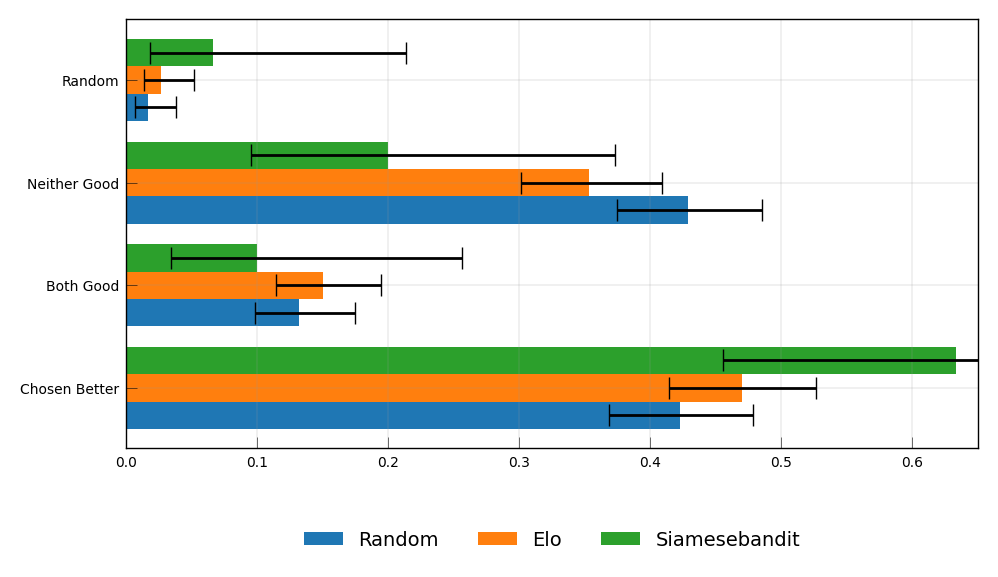

In [105]:
merged_df = SwipeProfileProfileChoiceSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')
merged_df = merged_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on='id')
merged_df = merged_df[merged_df['roundsPlayed'] > 20]

# Defining columns and categories
choice_column = 'AttributeDifficulty'
choice_categories = [
    'chosenBetter', 
    'bothGood',
    'neitherGood', 
    'random'
]

adjusted_labels = [
    'Chosen Better',
    'Both Good',
    'Neither Good',
    'Random'
]

rec_algorithms = merged_df['recAlgorithm'].unique()

# Calculate value counts normalized
grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

# Calculate confidence intervals
def wilson_score_interval(count, n, z=1.96):
    if n == 0:
        return 0, 0
    phat = count / n
    denominator = 1 + z**2 / n
    centre_adjusted_probability = phat + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((phat*(1 - phat) + z**2 / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

ci_lower = pd.DataFrame(index=choice_categories, columns=rec_algorithms)
ci_upper = pd.DataFrame(index=choice_categories, columns=rec_algorithms)

for algorithm in rec_algorithms:
    counts = merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts().reindex(choice_categories, fill_value=0)
    total = counts.sum()
    for category in choice_categories:
        lower, upper = wilson_score_interval(counts[category], total)
        ci_lower.loc[category, algorithm] = lower
        ci_upper.loc[category, algorithm] = upper

errors = [grouped_counts_df - ci_lower, ci_upper - grouped_counts_df]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        xerr=[errors[0][algorithm], errors[1][algorithm]],  # Adding error bars
        label=algorithm,
        capsize=4
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(adjusted_labels, rotation=0)
ax.set_xlim(0, 0.65)

ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/survey_45_round_fit_of_character.png")
plt.show()

### How did they perceive the recommendations to improve during the experiment? 

Survey Question:
- Do you feel that the recommendation system has learned and improved its suggestions since you began interacting with it?

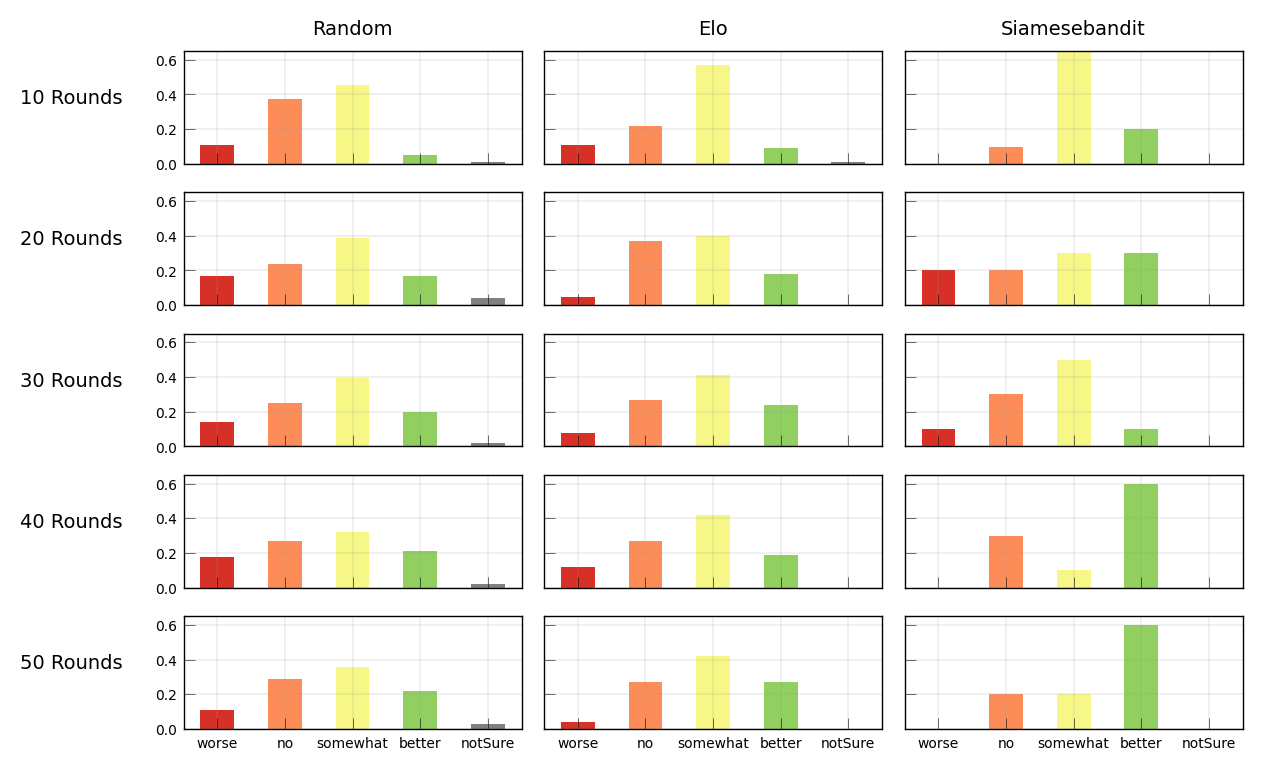

In [107]:
merged_df = SwipeProfileRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

rounds_played_categories = [10, 20, 30, 40, 50]
improvement_categories = ['worse', 'no', 'somewhat', 'better', 'notSure']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#d73027', '#fc8d59', '#f7f788', '#91cf60', 'grey']

fig, axes = plt.subplots(len(rounds_played_categories), len(rec_algorithms), figsize=(6, 4), sharey=True, dpi=200)

for row, rounds in enumerate(rounds_played_categories):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[(merged_df['recAlgorithm'] == algorithm) & (merged_df['roundsPlayed'] == rounds)]
        
        counts = filtered_df['Improvement'].value_counts(normalize=True).reindex(improvement_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(rounds_played_categories) - 1:
            axes[row, col].set_xticklabels(improvement_categories, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(f'{rounds} Rounds', rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.65)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/survey_did_recommendations_improve.png")
plt.show()

### How did they perceive the recommendation variety to change during the experiment? 

Survey Question:
- How would you describe the variety of user profiles you get recommended?

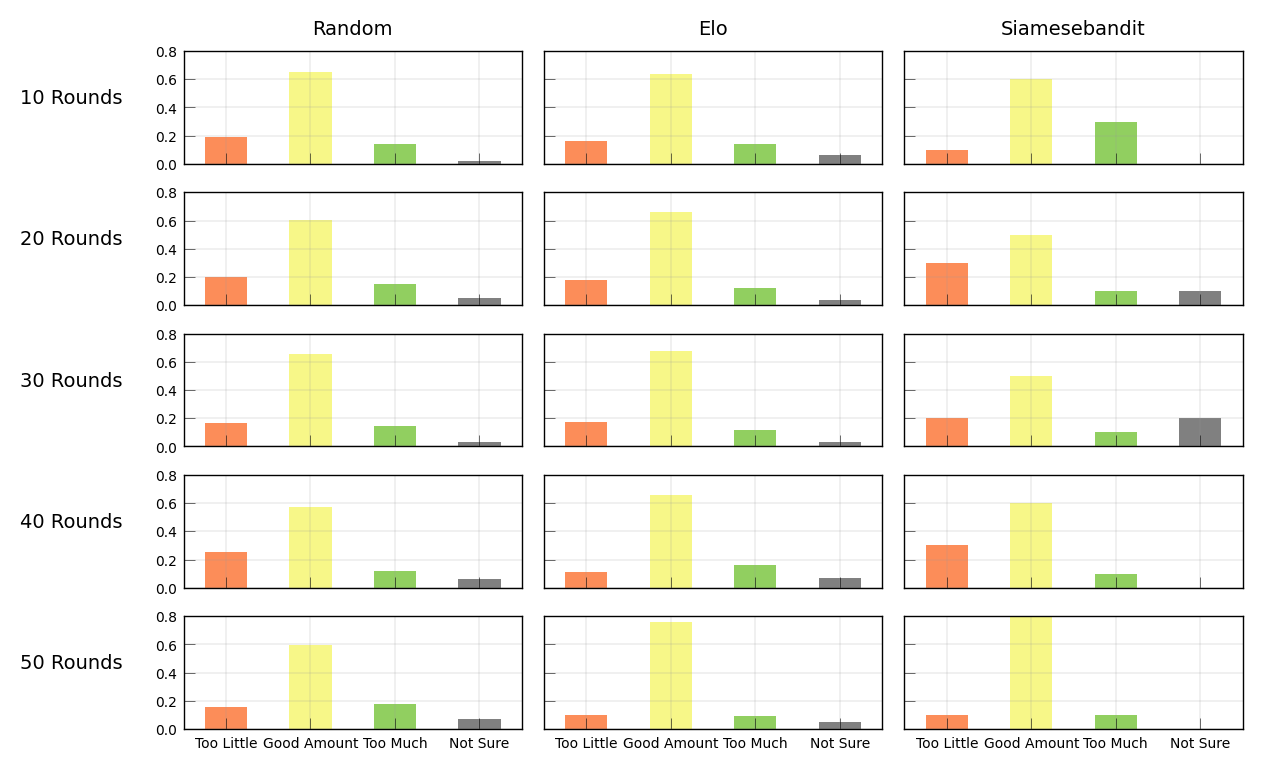

In [108]:
merged_df = SwipeProfileRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

rounds_played_categories = [10, 20, 30, 40, 50]
variety_categories = ['tooLittle', 'goodAmount', 'tooMuch', 'notSure']

adjusted_variety_labels = ['Too Little', 'Good Amount', 'Too Much', 'Not Sure']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60', 'grey']

fig, axes = plt.subplots(len(rounds_played_categories), len(rec_algorithms), figsize=(6, 4), sharey=True, dpi=200)

for row, rounds in enumerate(rounds_played_categories):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[(merged_df['recAlgorithm'] == algorithm) & (merged_df['roundsPlayed'] == rounds)]
        
        counts = filtered_df['Variety'].value_counts(normalize=True).reindex(variety_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(rounds_played_categories) - 1:
            axes[row, col].set_xticklabels(adjusted_variety_labels, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(f'{rounds} Rounds', rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/survey_variety_of_recommendations.png")
plt.show()

### Which attributes do they think the algorithm learnt?

Survey Question:
- To what extent do you think the algorithm learned about your character’s preferences regarding the following attributes? Rank each:

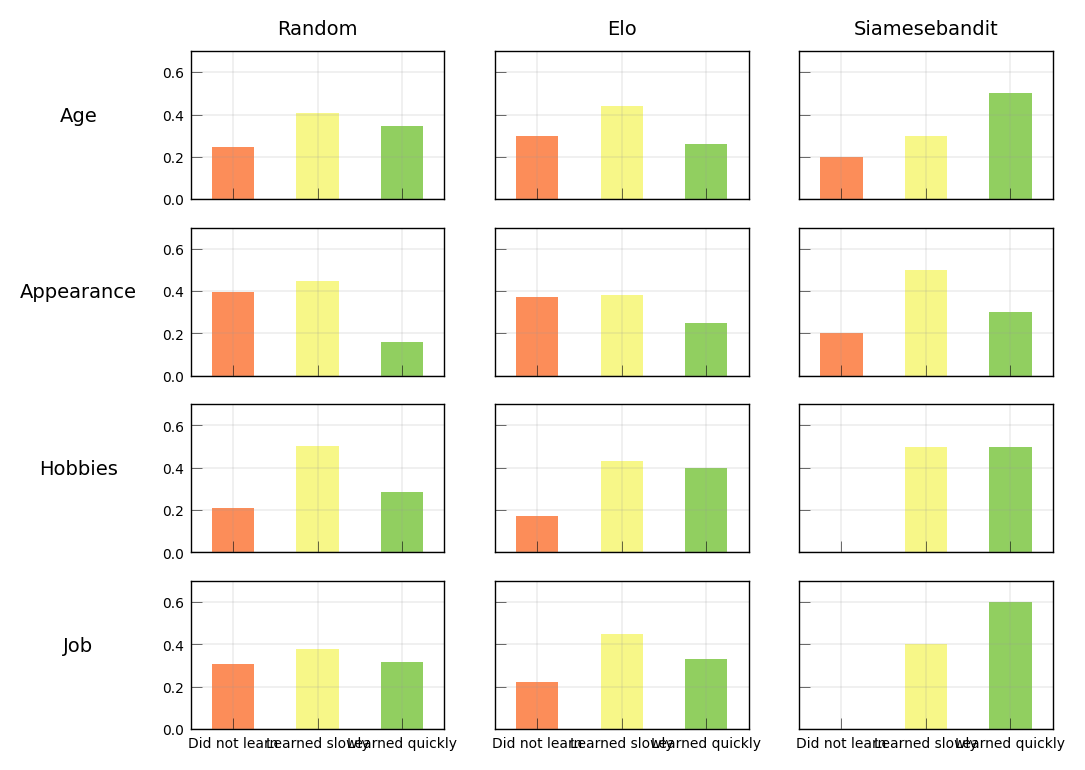

In [85]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

attribute_columns = [col for col in endRecSystemSurvey_df.columns if 'algorithmLearntAttribute' in col]
attribute_categories = ['Did not learn', 'Learned slowly', 'Learned quickly']

rec_algorithms = merged_df['recAlgorithm'].unique()

colors = ['#fc8d59', '#f7f788', '#91cf60']

fig, axes = plt.subplots(len(attribute_columns), len(rec_algorithms), figsize=(5, 4), sharey=True, dpi=200)

for row, attribute in enumerate(attribute_columns):
    for col, algorithm in enumerate(rec_algorithms):
        filtered_df = merged_df[merged_df['recAlgorithm'] == algorithm]
        
        counts = filtered_df[attribute].value_counts(normalize=True).reindex(attribute_categories, fill_value=0)
        
        counts.plot(kind='bar', ax=axes[row, col], color=colors, legend=False)
        
        if row == len(attribute_columns) - 1:
            axes[row, col].set_xticklabels(attribute_categories, rotation=0)
        else:
            axes[row, col].set_xticklabels([])
        
        if col == 0:
            axes[row, col].set_ylabel(attribute.replace('algorithmLearntAttribute-', ''), rotation=0, labelpad=30)
        
        if row == 0:
            axes[row, col].set_title(algorithm.capitalize())
        
        axes[row, col].set_ylim(0, 0.7)


plt.tight_layout()
plt.subplots_adjust(top=0.9, left=0.1)
plt.savefig("visualisations/end_survey_what_did_recommender_learn.png")
plt.show()

### How did they perceive algorithm diversity?

Survey Question:
- Regarding the diversity of recommendations, do you think:

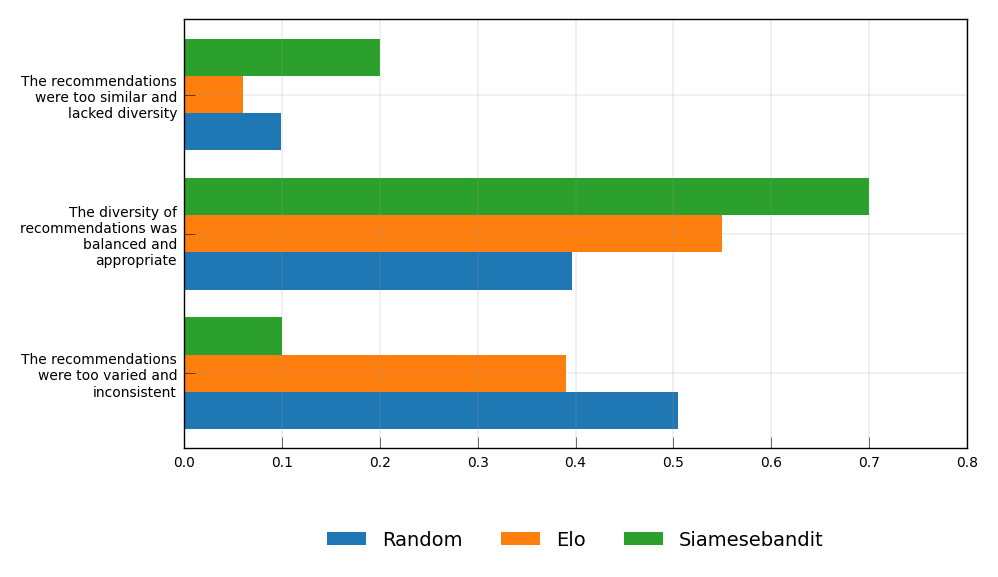

In [88]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'recommendationDiversity'
choice_categories = [
    'The recommendations were too varied and inconsistent', 
    'The diversity of recommendations was balanced and appropriate', 
    'The recommendations were too similar and lacked diversity'
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        label=algorithm
    )


ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.set_xlim(0, 0.8)
ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_algorithm_diversity.png")
plt.show()

### How did they perceive algorithm quality?

Survey Question:
- Regarding the quality of recommendations, do you think:

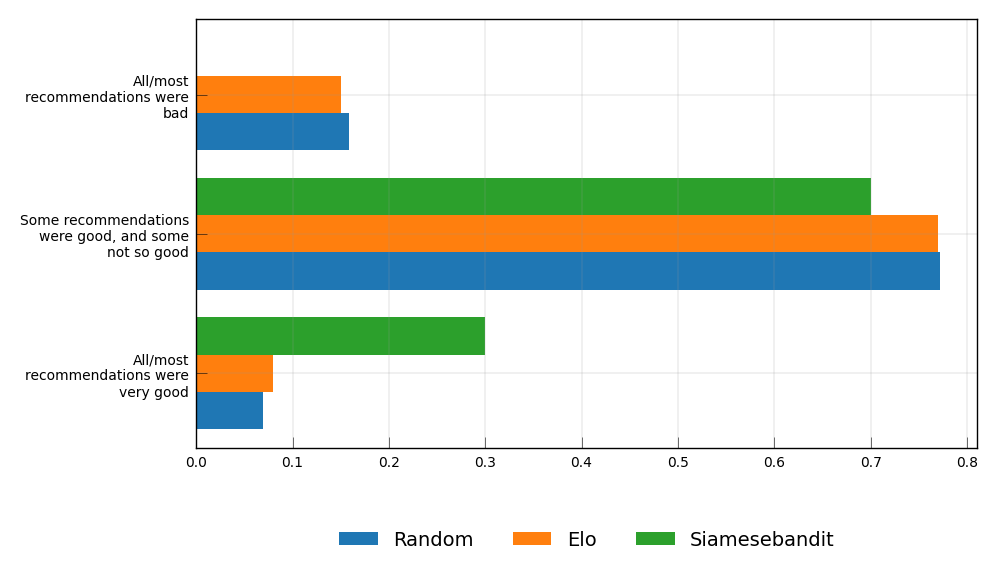

In [89]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'recommendationQuality'
choice_categories = [
    "All/most recommendations were very good", 
    "Some recommendations were good, and some not so good", 
    "All/most recommendations were bad"
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms 

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
#         color=colors[i % len(colors)], 
        label=algorithm
    )


ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0)

ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_algorithm_quality.png")
plt.show()

### Which type of algorithm do they think they got?

Survey Question:
- Which of the following algorithms do you think was used to recommend profiles to you during the previous experiment?

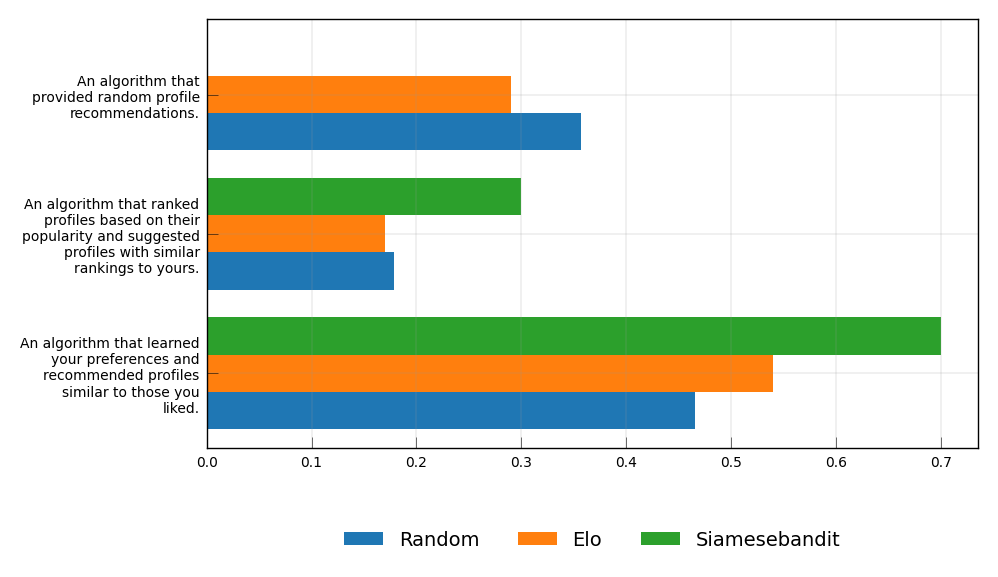

In [90]:
merged_df = endRecSystemSurvey_df.merge(player_df[['playerID', 'recAlgorithm']], on='playerID', how='left')

choice_column = 'algorithmChoice'
choice_categories = [
    "An algorithm that learned your preferences and recommended profiles similar to those you liked.",
    "An algorithm that ranked profiles based on their popularity and suggested profiles with similar rankings to yours.",
    "An algorithm that provided random profile recommendations."
]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=25)) for label in choice_categories]

rec_algorithms = merged_df['recAlgorithm'].unique()

grouped_counts = {
    algorithm: merged_df[merged_df['recAlgorithm'] == algorithm][choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
    for algorithm in rec_algorithms
}

grouped_counts_df = pd.DataFrame(grouped_counts, index=choice_categories)

fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

n_categories = len(choice_categories)
n_algorithms = len(rec_algorithms)
bar_height = 0.8 / n_algorithms

bar_positions = range(n_categories)

for i, algorithm in enumerate(rec_algorithms):
    bar_offset = (i - (n_algorithms / 2)) * bar_height + bar_height / 2
    ax.barh(
        [pos + bar_offset for pos in bar_positions],
        grouped_counts_df[algorithm],
        height=bar_height,
        label=algorithm
    )

ax.set_yticks(bar_positions)
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.legend([label.capitalize() for label in rec_algorithms], bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(rec_algorithms))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("visualisations/end_survey_which_algorithm.png")
plt.show()

### What types of factors do they consider when dating? What factors do they think an algorithm should be allowed to consider?

Survey Questions:
- What factors would you consider when determining if someone is a good match on a dating app? Rank each:
- Dating apps use various aspects of user profiles to make recommendations. From an ethical standpoint, which of the following factors do you believe should be permissible for them to consider? Rank each:

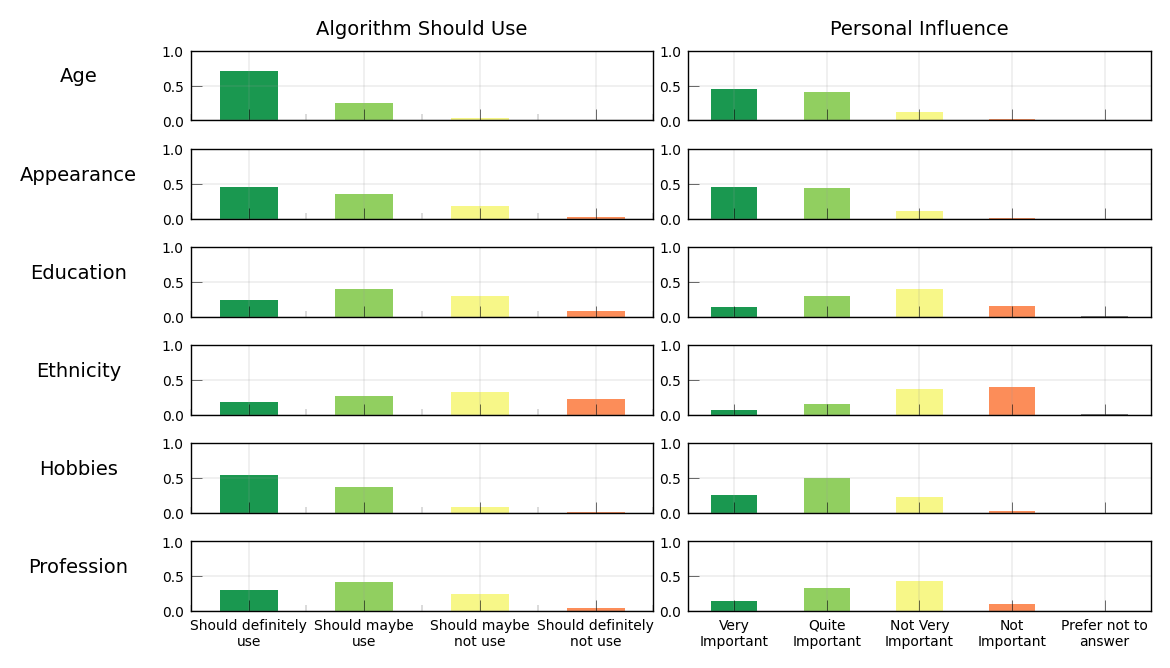

In [91]:
algorithm_columns = [col for col in endDatingAppSurvey_df.columns if 'AlgorithmShouldUse' in col]
influence_columns = [col for col in endDatingAppSurvey_df.columns if 'PersonalInfluence' in col]

algorithm_categories = ['Should definitely use', 'Should maybe use', 'Should maybe not use', 'Should definitely not use']
influence_categories = ['Very Important', 'Quite Important', 'Not Very Important', 'Not Important', 'Prefer not to answer']

algorithm_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(algorithm_categories, fill_value=0) for col in algorithm_columns}
influence_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}

colors_algorithm = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59']
colors_influence = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59', 'gray']

def split_labels(labels):
    split_points = {
        'Should definitely use': 'Should definitely\nuse',
        'Should maybe use': 'Should maybe\nuse',
        'Should maybe not use': 'Should maybe\nnot use',
        'Should definitely not use': 'Should definitely\nnot use',
        'Very Important': 'Very\nImportant',
        'Quite Important': 'Quite\nImportant',
        'Not Very Important': 'Not Very\nImportant',
        'Not Important': 'Not\nImportant',
        'Prefer not to answer': 'Prefer not to\nanswer'
    }
    return [split_points[label] for label in labels]
fig, axs = plt.subplots(len(algorithm_columns), 2, figsize=(8, 4), sharex='col', dpi=200)

for row, (col, counts) in enumerate(algorithm_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors_algorithm, legend=False)
    axs[row, 0].set_ylabel(col.replace('AlgorithmShouldUse-', ''), rotation=0, labelpad=30)
    axs[row, 0].set_xlabel('')
    if row == len(algorithm_columns) - 1:
        axs[row, 0].set_xticklabels(split_labels(algorithm_categories), rotation=0)
    axs[row, 0].set_ylim(0, 1)

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors_influence, legend=False)
    axs[row, 1].set_xlabel('')
    if row == len(influence_columns) - 1:
        axs[row, 1].set_xticklabels(split_labels(influence_categories), rotation=0)
    axs[row, 1].set_ylim(0, 1)

axs[0, 0].set_title('Algorithm Should Use')
axs[0, 1].set_title('Personal Influence')

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)

plt.savefig("visualisations/end_survey_which_factors_real_dating_alls_should_use.png")
plt.show()

### What dating apps have they used before?

Survey Question:
- Which dating apps have you used before? (Check all that apply)

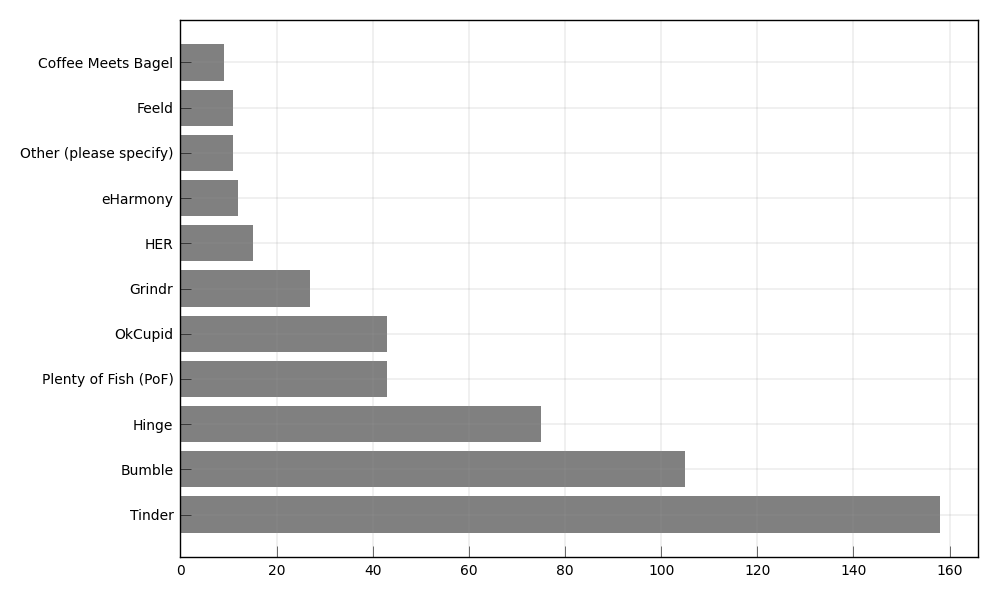

In [92]:
app_counts = {}
for apps in endDatingAppSurvey_df['datingAppsUsed']:
    app_list = ast.literal_eval(apps)
    for app in app_list:
        if app in app_counts:
            app_counts[app] += 1
        else:
            app_counts[app] = 1

app_counts_df = pd.DataFrame(list(app_counts.items()), columns=['App', 'Count'])

app_counts_df = app_counts_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(5, 3), dpi=200)
plt.barh(app_counts_df['App'], app_counts_df['Count'], color='grey')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.tight_layout()
plt.savefig("visualisations/end_survey_which_dating_apps_have_they_used.png")
plt.show()